## 데이터 시각화(1)
### NYC 뉴욕 택시 데이터 EDA
- 시간대별 콜 수는?
- 요일별 콜 수는?
- 배우는 내용
    - 데이터 시각화(seaborn, plotly(cufflinks))
    - Python에서 BigQuery 사용하기
    

### 라이브러리 설치 

In [3]:
!pip install plotly==3.10.0
!pip install cufflinks==0.16

In [4]:
!pip3 install plotly cufflinks pandas numpy seaborn matplotlib pandas-gbq

In [2]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.16


### 1월의 전체 Trip 수

In [3]:
%%time
query = """
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour
"""

df = pd.read_gbq(query=query, dialect='standard', project_id='my_id', auth_local_webserver=True)

CPU times: user 621 ms, sys: 237 ms, total: 858 ms
Wall time: 12 s


In [4]:
df.head(10)

pickup_hour    cnt
0 2015-01-01 00:00:00  28312
1 2015-01-01 01:00:00  31707
2 2015-01-01 02:00:00  28068
3 2015-01-01 03:00:00  24288
4 2015-01-01 04:00:00  17081
5 2015-01-01 05:00:00   9112
6 2015-01-01 06:00:00   6637
7 2015-01-01 07:00:00   6011
8 2015-01-01 08:00:00   5586
9 2015-01-01 09:00:00   6977

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pickup_hour  744 non-null    datetime64[ns]
 1   cnt          744 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [6]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

In [7]:
df.head()

pickup_hour    cnt
0 2015-01-01 00:00:00  28312
1 2015-01-01 01:00:00  31707
2 2015-01-01 02:00:00  28068
3 2015-01-01 03:00:00  24288
4 2015-01-01 04:00:00  17081

In [8]:
df = df.set_index('pickup_hour')

In [9]:
df.head()

cnt
pickup_hour               
2015-01-01 00:00:00  28312
2015-01-01 01:00:00  31707
2015-01-01 02:00:00  28068
2015-01-01 03:00:00  24288
2015-01-01 04:00:00  17081

In [152]:
#df.iplot?

In [10]:
df.iplot(kind='scatter',xTitle='Datetimes',yTitle='Demand',title='NYC Taxi Demand(2015-01)')

- Jan 27, 2015 02:00에 급격히 하락한 건수
    - 2015년 1월 23일에 큰 눈폭풍이 발생해 26.8인치 만큼의 눈이 옴
    - 전체 택시 trip 횟수가 크게 감소
    - [Wikipedia](https://en.wikipedia.org/wiki/January_2015_North_American_blizzard)


### Date별 trip수


In [13]:
df['date'] = df.index.date

In [15]:
df.head()

cnt        date
pickup_hour                           
2015-01-01 00:00:00  28312  2015-01-01
2015-01-01 01:00:00  31707  2015-01-01
2015-01-01 02:00:00  28068  2015-01-01
2015-01-01 03:00:00  24288  2015-01-01
2015-01-01 04:00:00  17081  2015-01-01

In [14]:
df.groupby(['date'])[['cnt']].sum().iplot()

### 요일별 시간대별 Trip 수

In [16]:
df.head(2)

cnt        date
pickup_hour                           
2015-01-01 00:00:00  28312  2015-01-01
2015-01-01 01:00:00  31707  2015-01-01

In [17]:
df['weekday'] = df.index.weekday #월화수목금
df['hour'] = df.index.hour
df['weeknum'] = df.index.week #1주차, 2주차, 3주차

In [18]:
df.head()

cnt        date  weekday  hour  weeknum
pickup_hour                                                   
2015-01-01 00:00:00  28312  2015-01-01        3     0        1
2015-01-01 01:00:00  31707  2015-01-01        3     1        1
2015-01-01 02:00:00  28068  2015-01-01        3     2        1
2015-01-01 03:00:00  24288  2015-01-01        3     3        1
2015-01-01 04:00:00  17081  2015-01-01        3     4        1

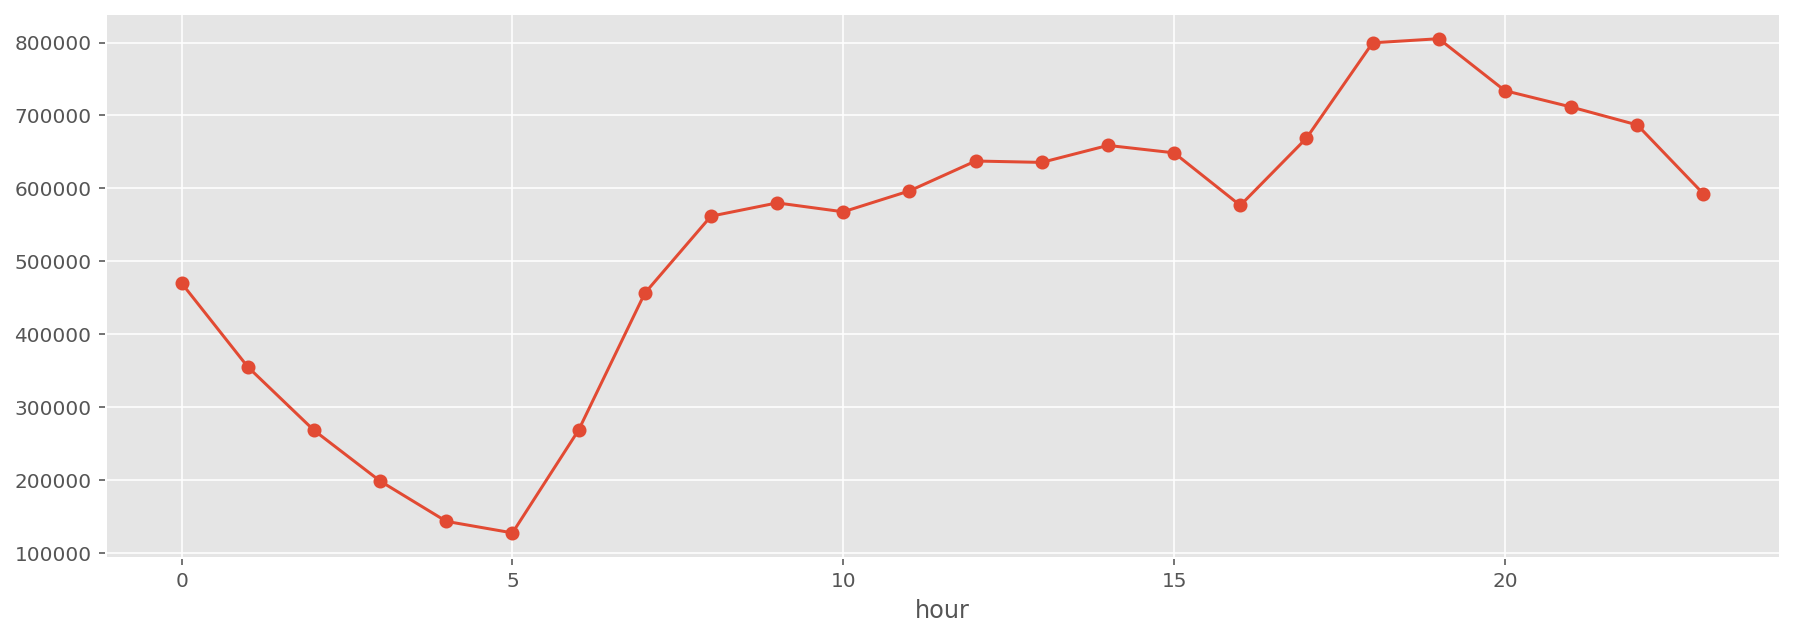

In [19]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y='cnt', kind='line', style="-o", figsize=(15,5));

- Peak : 18~19
- Off-peak : 5

In [20]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()

weekday         0         1         2        3        4        5         6
hour                                                                      
0         8552.75   6719.25   8787.00  14326.4  14054.2  25487.2  26099.00
1         5360.50   3707.00   5283.25  11440.4   8785.6  21118.6  22754.75
2         3675.25   2361.75   3337.75   8753.6   5856.8  16382.0  18918.00
3         2730.00   1504.00   2307.00   7030.2   3948.6  12112.0  14226.50
4         2691.25   1633.75   2297.25   5444.8   3341.8   7730.4   8549.25
5         4134.25   3159.00   4057.75   5198.2   4150.0   3911.8   3933.25
6        10065.25   8757.25  11587.00  10925.0  10476.0   4775.6   3983.50
7        16805.75  15820.50  21199.25  18754.0  18194.6   6866.8   5437.00
8        20491.50  19087.25  25219.00  21822.0  21141.8  10864.2   8367.75
9        19523.75  17816.50  23168.50  20452.4  20887.2  16092.6  12709.50
10       17472.00  15789.25  19927.25  18513.0  19261.4  19139.8  17623.25
11       17686.50  15787.25  19353.50  18655.8  19461.6  22176.2  20931.75
12       18895.50  16485.50  19966.50  20012.2  20504.8  24463.2  22797.00
13       18992.00  16207.50  19705.75  19665.6  20420.8  24672.0  23043.50
14       19236.25  17799.00  21159.25  21190.2  22205.4  23745.2  22601.25
15       18196.00  17957.25  20797.50  21120.2  21371.6  24556.4  21411.00
16       15692.50  16034.00  18004.75  17873.0  18450.8  22746.0  20581.00
17       17700.25  19508.75  22432.25  21493.8  22978.8  24729.8  21053.25
18       20559.00  24636.75  28379.25  26537.0  28569.0  28580.8  21713.25
19       19470.75  24012.00  29024.75  27292.6  30551.4  29679.6  19395.50
20       17094.00  22860.25  26898.50  26051.6  28076.0  25360.0  17275.75
21       15598.50  22501.75  26550.75  25974.4  27044.2  24953.2  15779.00
22       13167.25  19352.00  24384.25  24652.2  28099.0  27495.2  14528.25
23        9427.00  13983.00  17168.75  20464.0  27606.0  28303.0  12062.25

In [21]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()

- pivot_table로도 가능

In [22]:
df[['cnt', 'hour', 'weekday']].pivot_table('cnt', index='hour', columns='weekday', aggfunc='mean').iplot(kind='scatter')

- weekday별 trip 수

In [23]:
df.groupby('weekday')[['cnt']].mean().iplot(kind='bar')

### 평일/주말별 Trip 수

In [24]:
df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int) #주말

In [25]:
df.groupby(['hour', 'is_weekend'])['cnt'].mean().unstack().iplot()

### 요일별 시간대별 히트맵

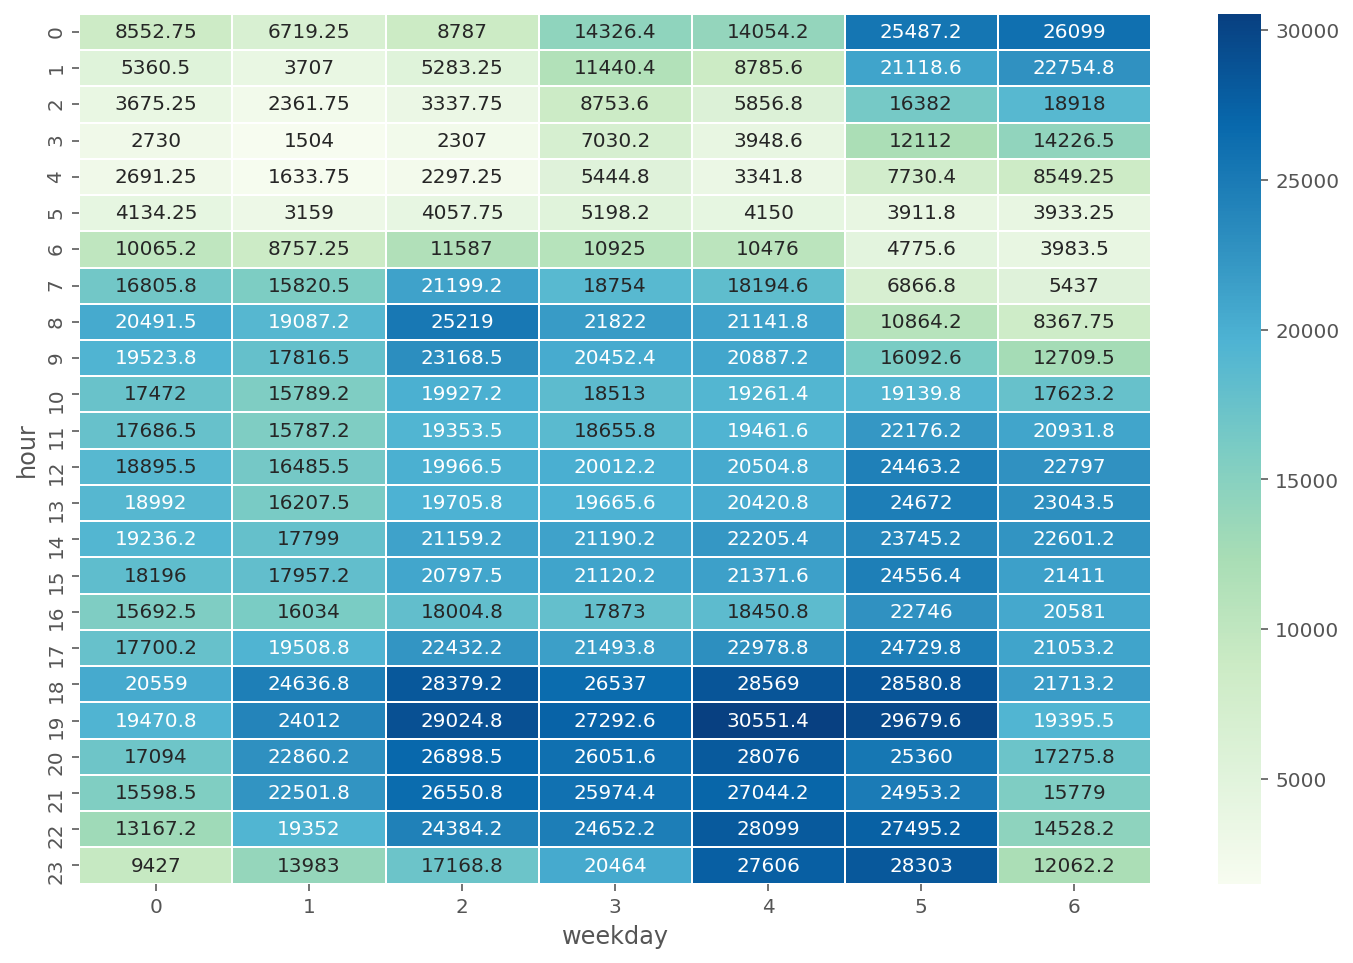

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.groupby(['hour', 'weekday'])['cnt'].mean().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});

- 금요일 오후부터 Call이 상승

In [27]:
average_df = df.groupby(['is_weekend', 'hour']).mean()['cnt'].unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

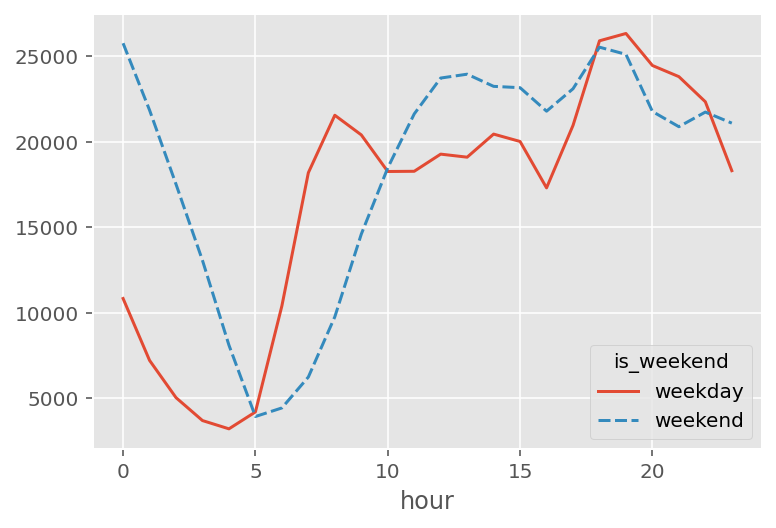

In [28]:
sns.lineplot(data=average_df);

In [29]:
df.head(3)

cnt        date  weekday  hour  weeknum  is_weekend
pickup_hour                                                               
2015-01-01 00:00:00  28312  2015-01-01        3     0        1           0
2015-01-01 01:00:00  31707  2015-01-01        3     1        1           0
2015-01-01 02:00:00  28068  2015-01-01        3     2        1           0

In [30]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_vars=[0,1,2,3,4,5,6], value_name='cnt')

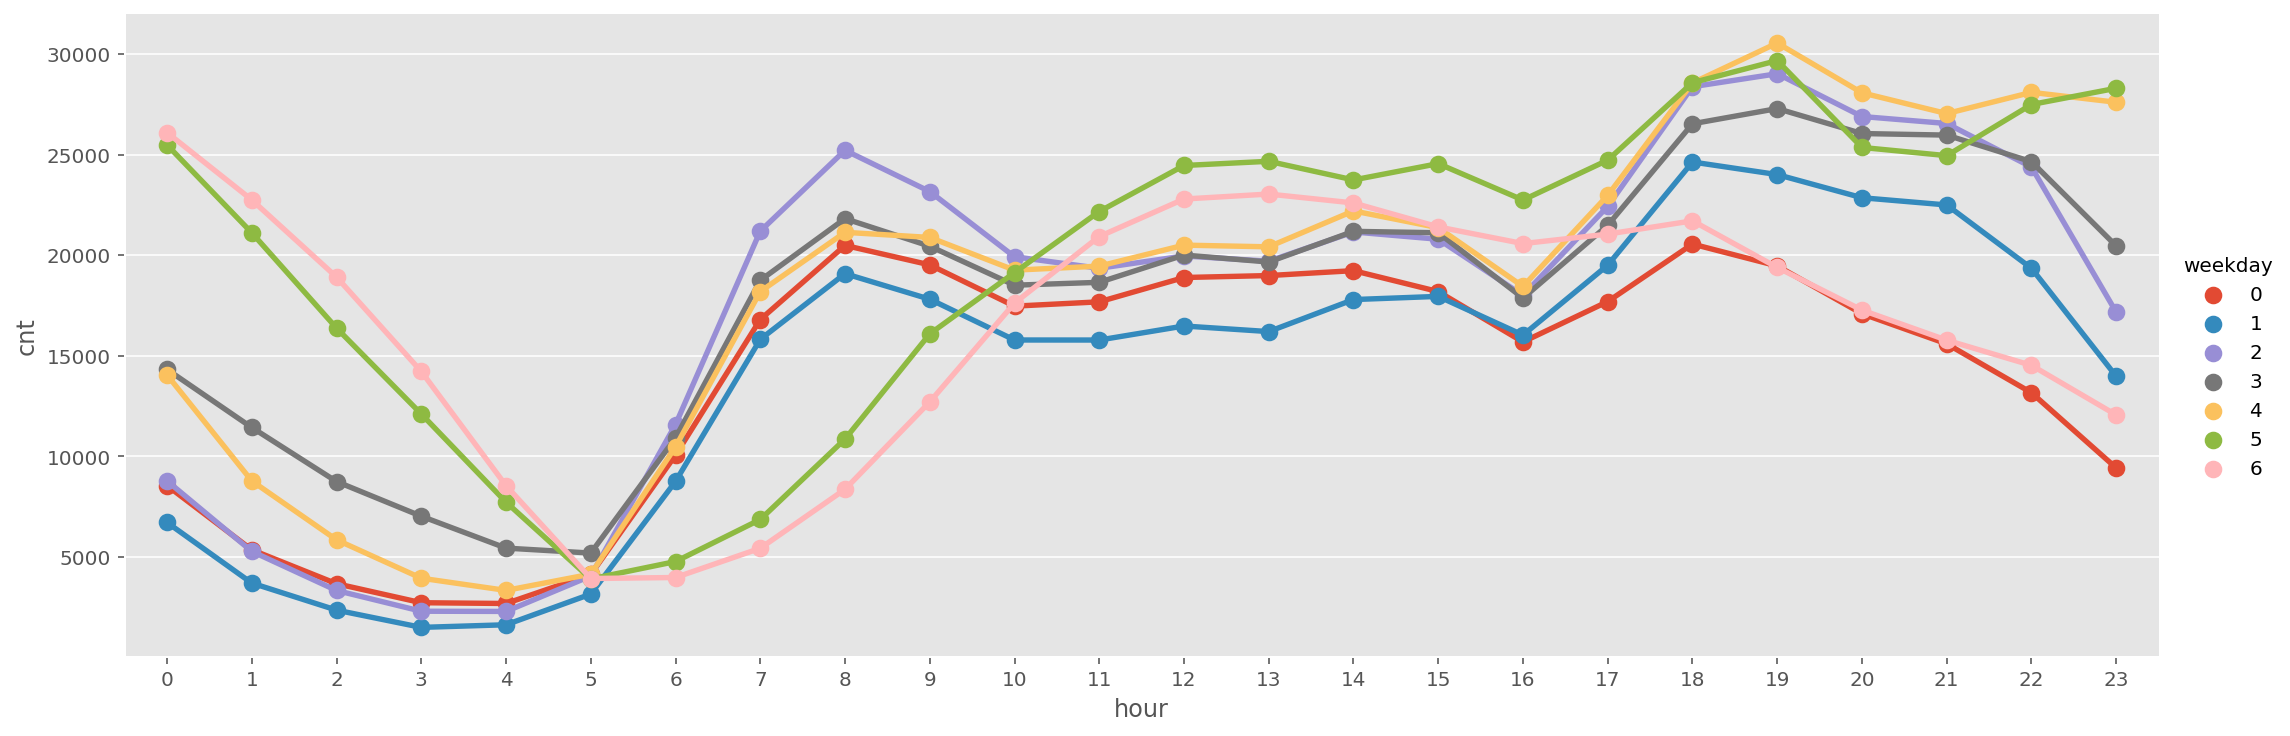

In [68]:
sns.factorplot(x="hour", y='cnt', hue="weekday", data=data, height=5, aspect=3);

### Boxplot
- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

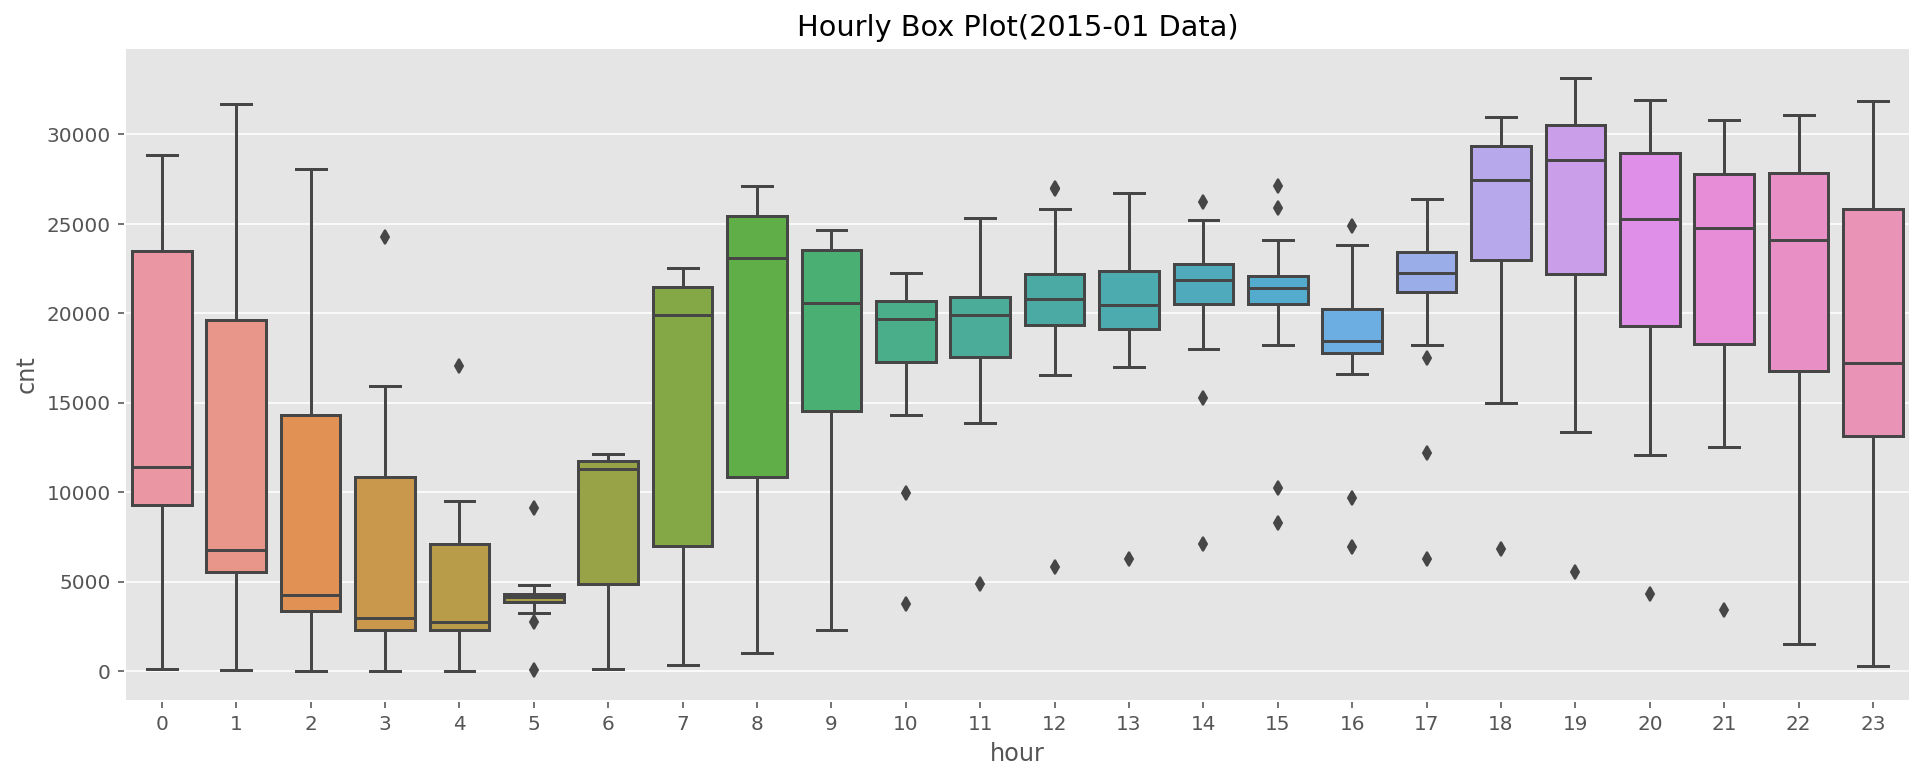

In [31]:
#1달
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df);
plt.title("Hourly Box Plot(2015-01 Data)");

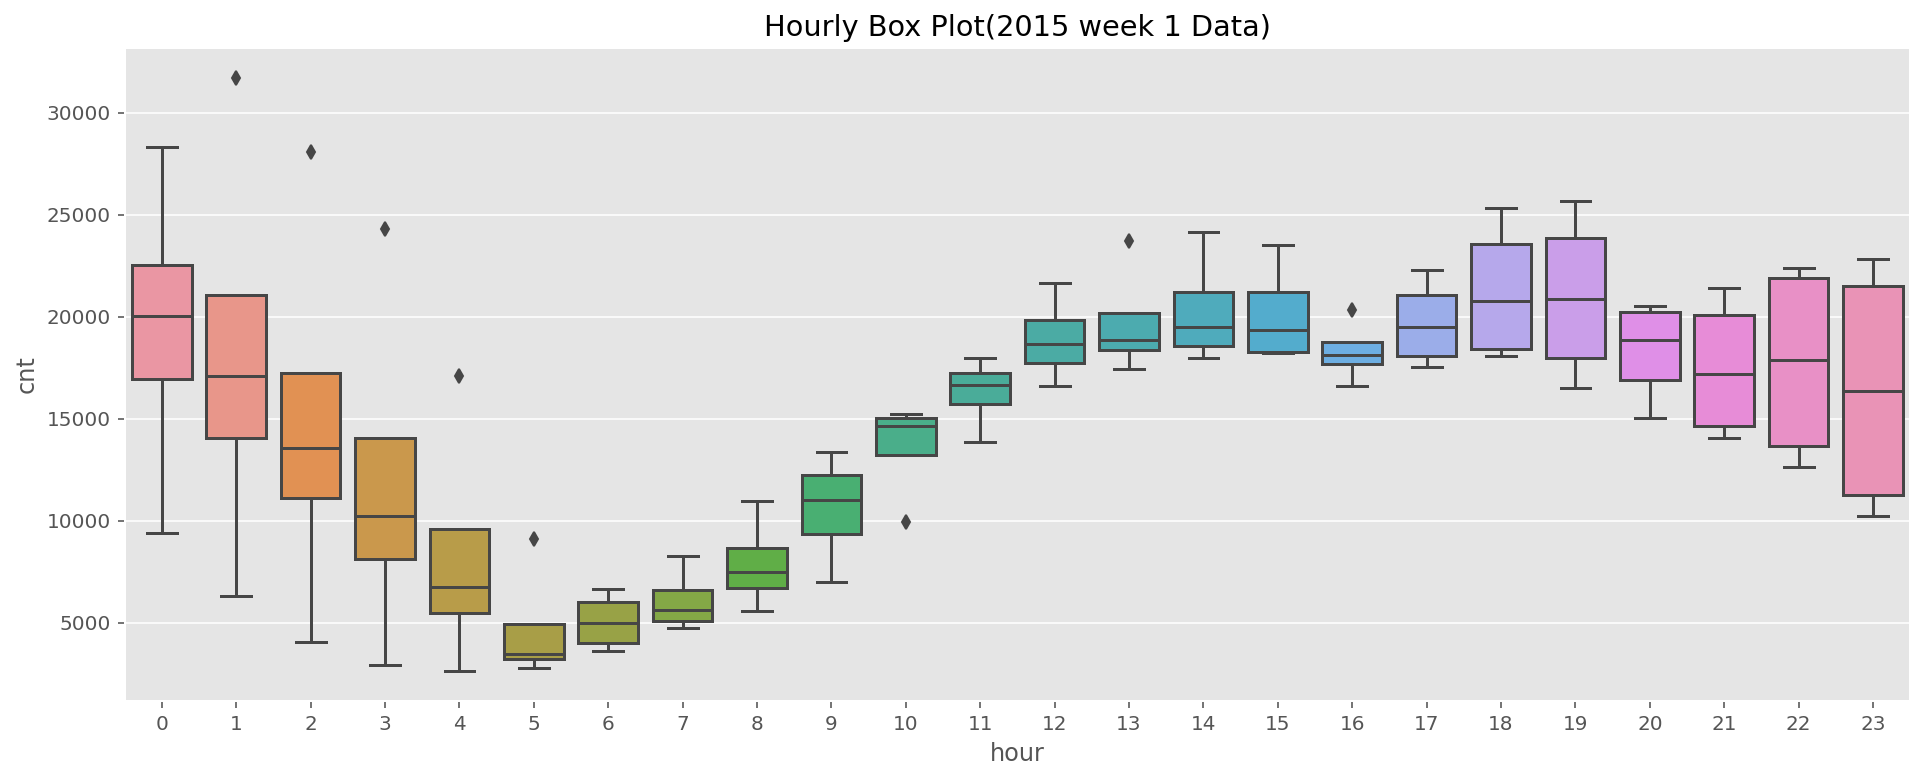

In [32]:
#1주차
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1]);
plt.title("Hourly Box Plot(2015 week 1 Data)");

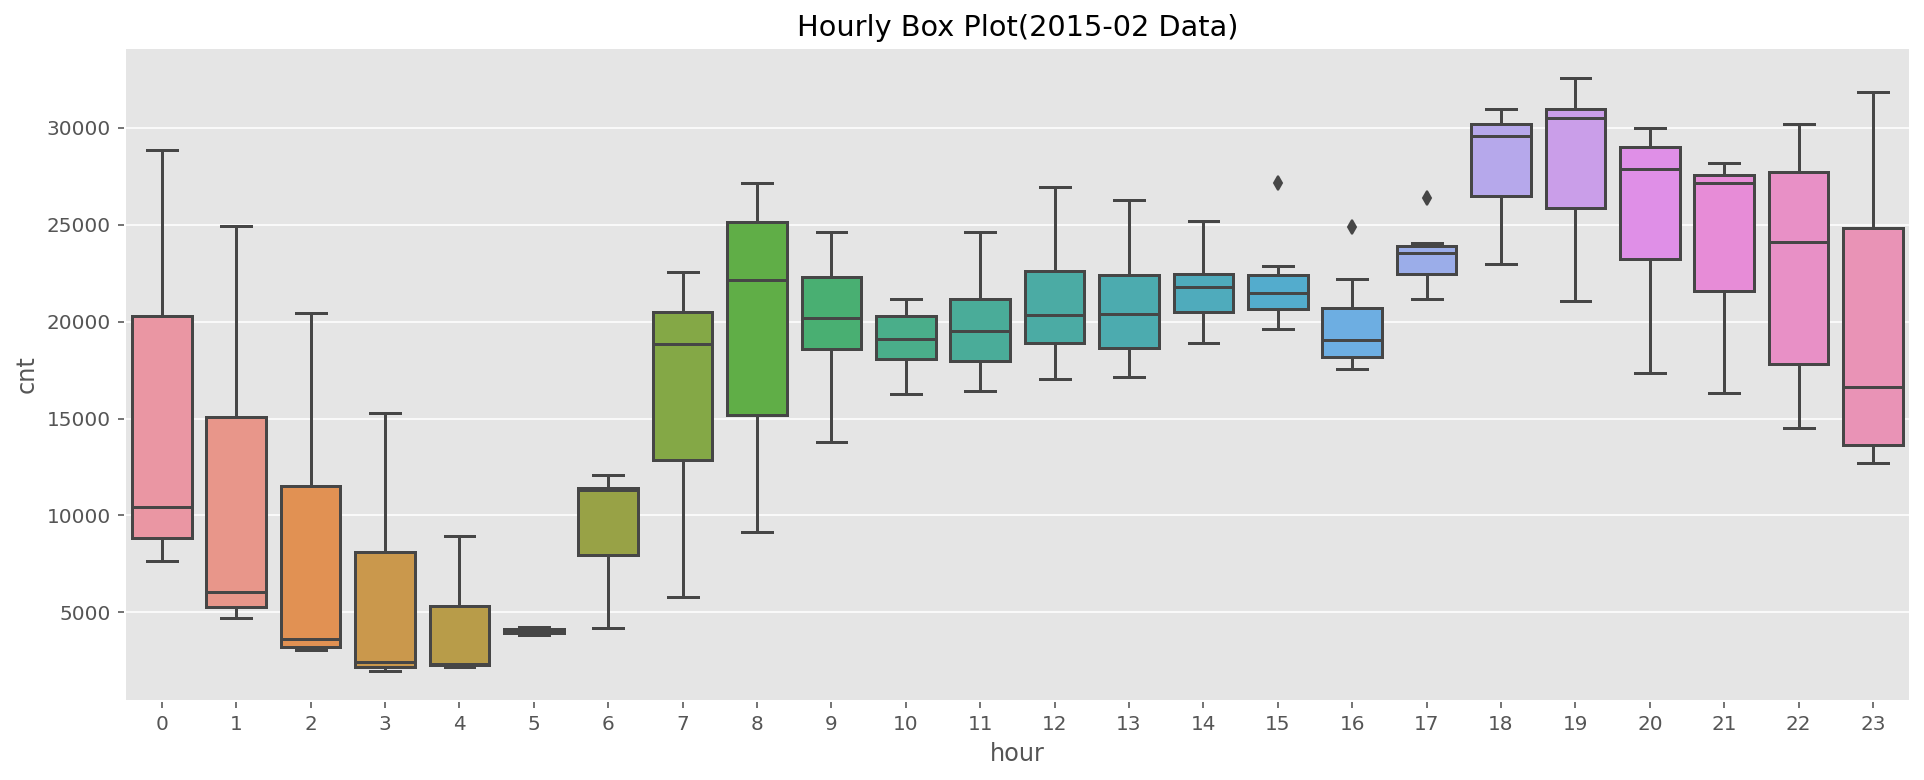

In [33]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==2]);
plt.title("Hourly Box Plot(2015-02 Data)");

In [34]:
def visualize_hourly_boxplot_by_weeknum(df, y, weeknum):
    plt.figure(figsize=(16, 6));
    sns.boxplot(x='hour', y=y, data=df[df['weeknum']==weeknum]);
    plt.title(f"Hourly Box Plot(2015-{weeknum:02} Data)");

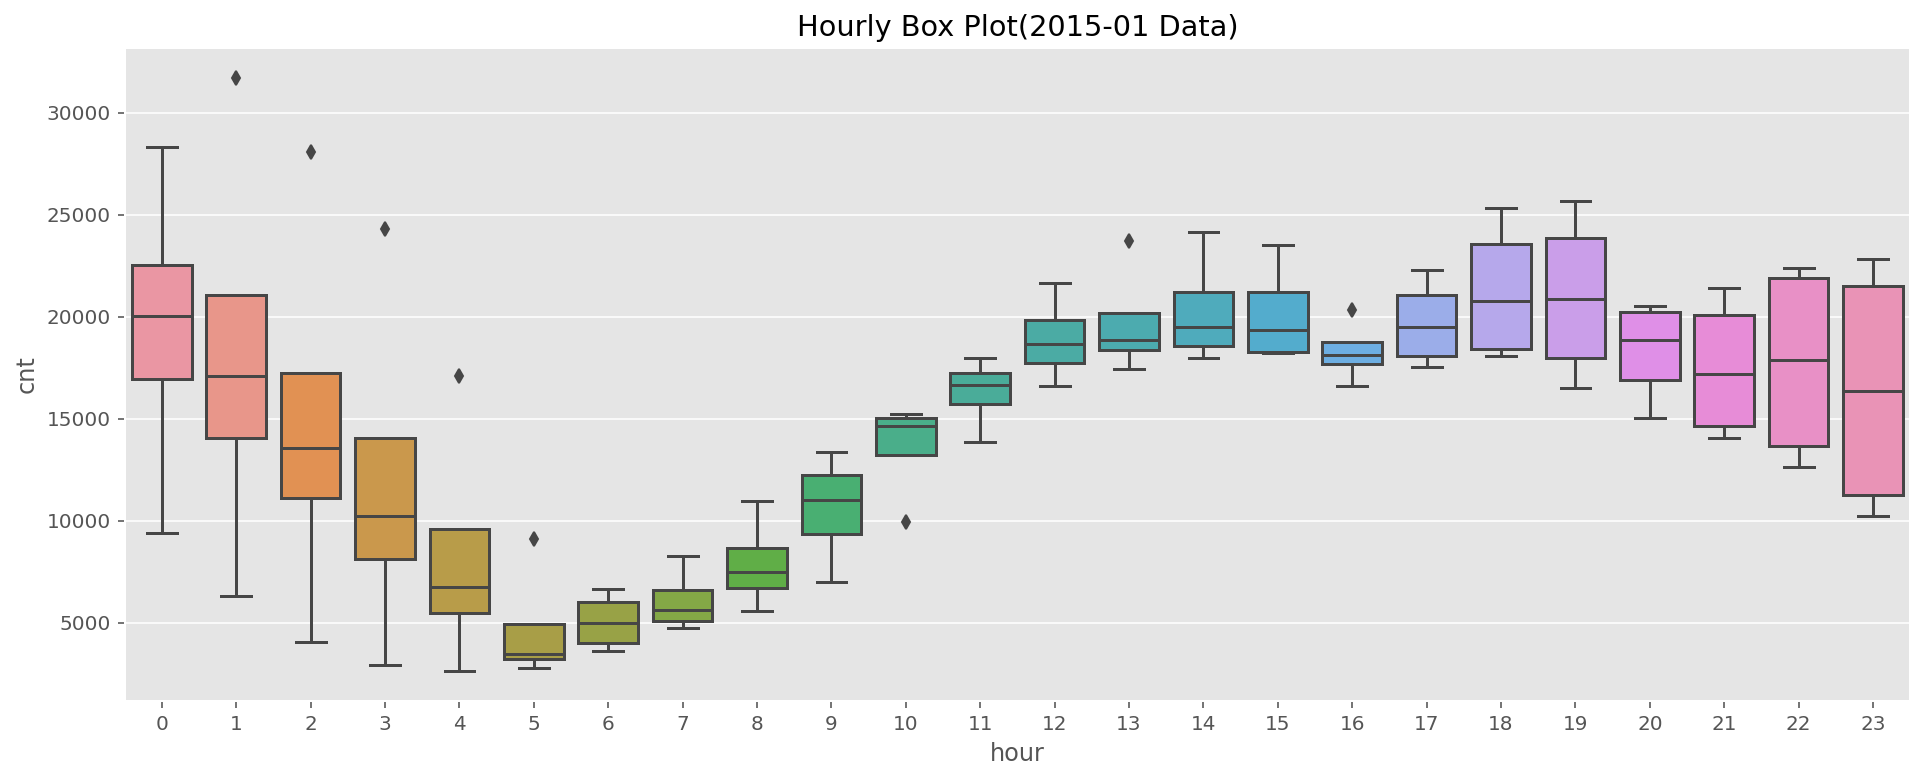

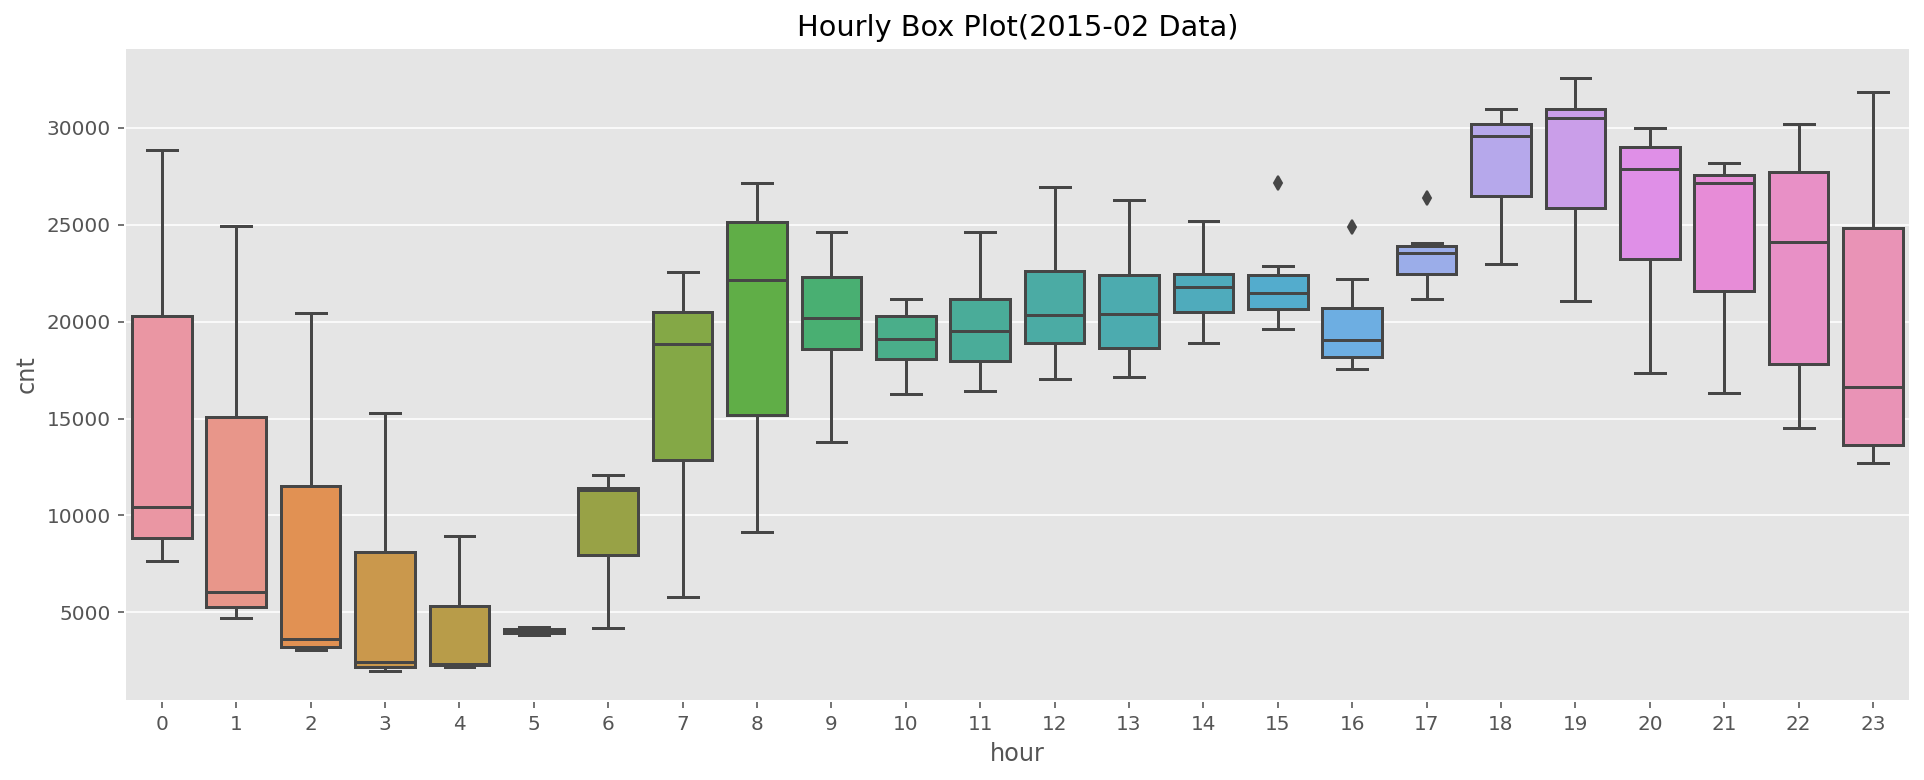

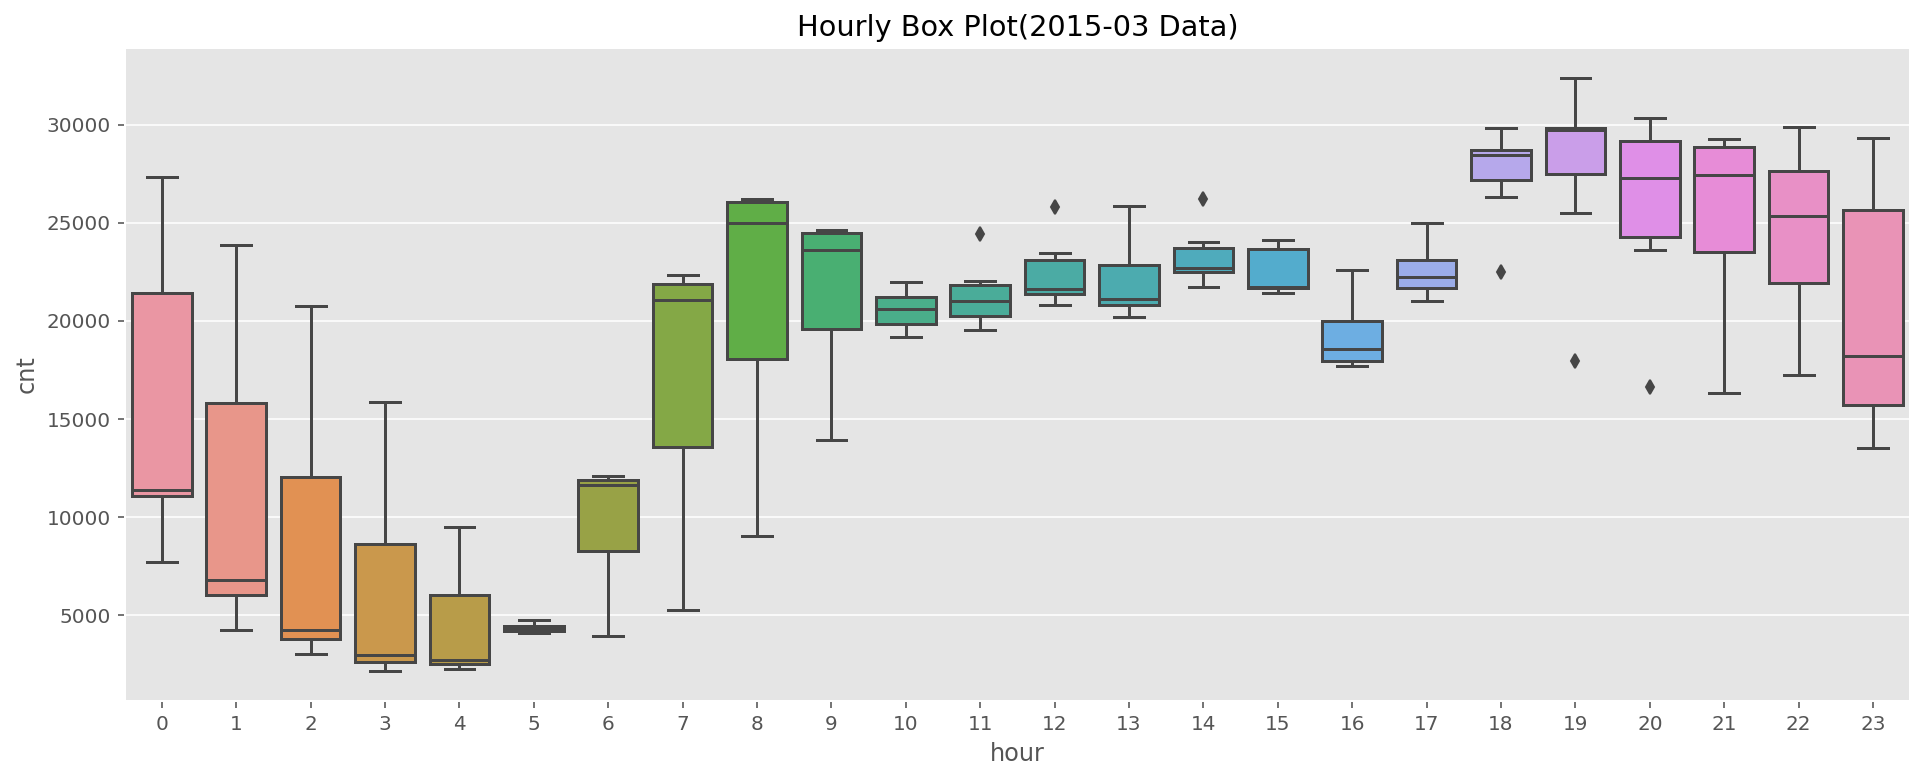

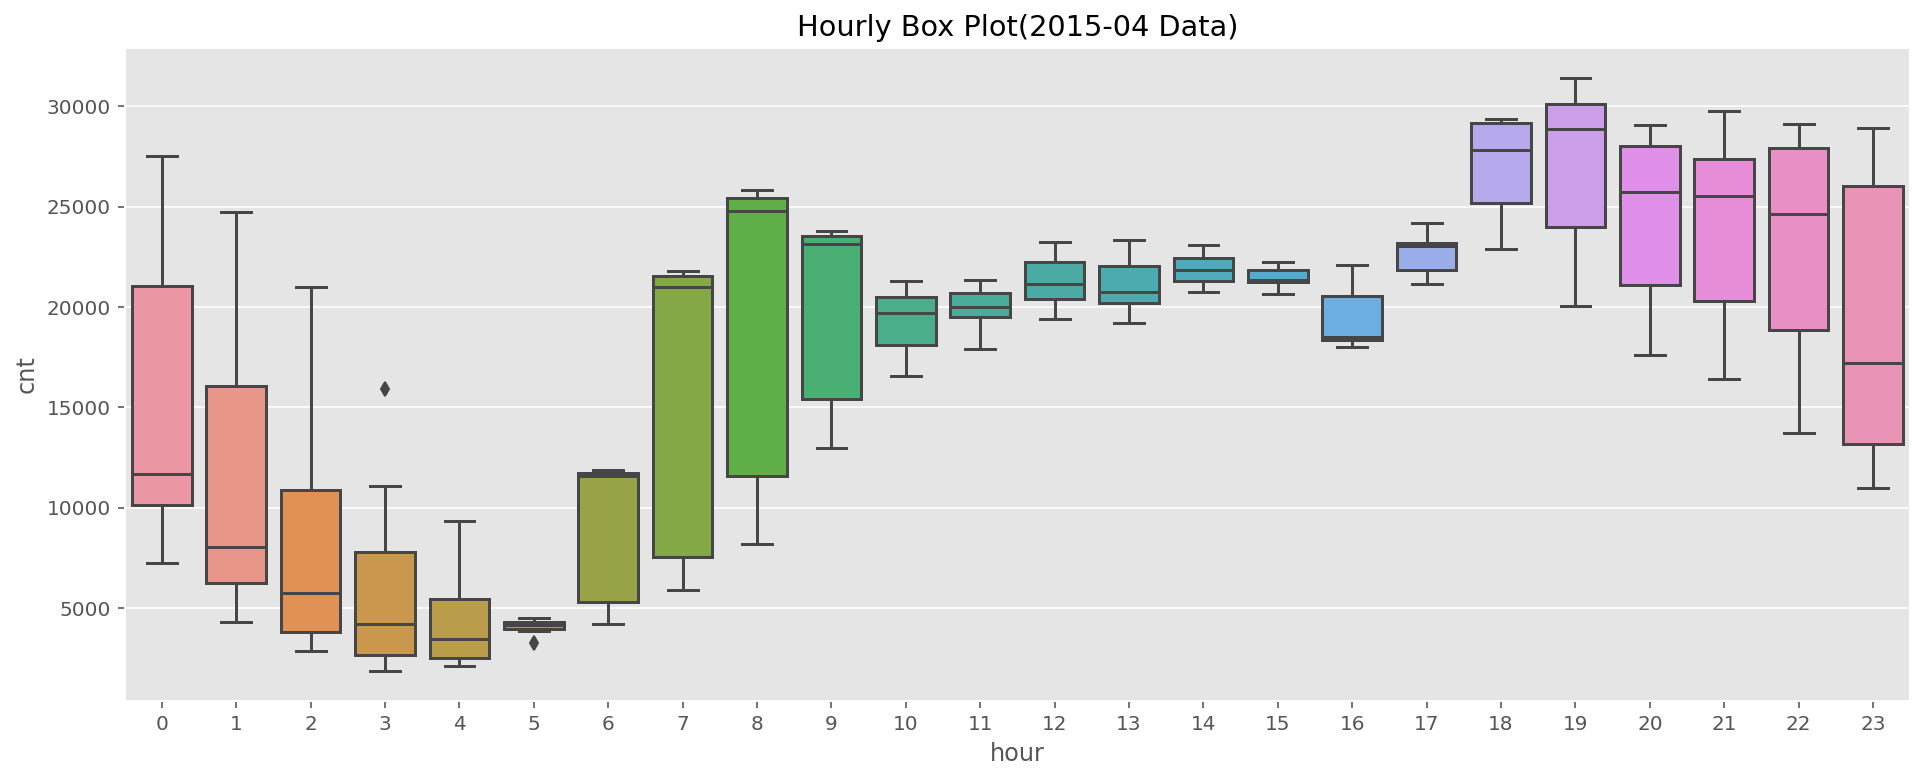

In [35]:
for week in range(1, 5):
    visualize_hourly_boxplot_by_weeknum(df, 'cnt', week)

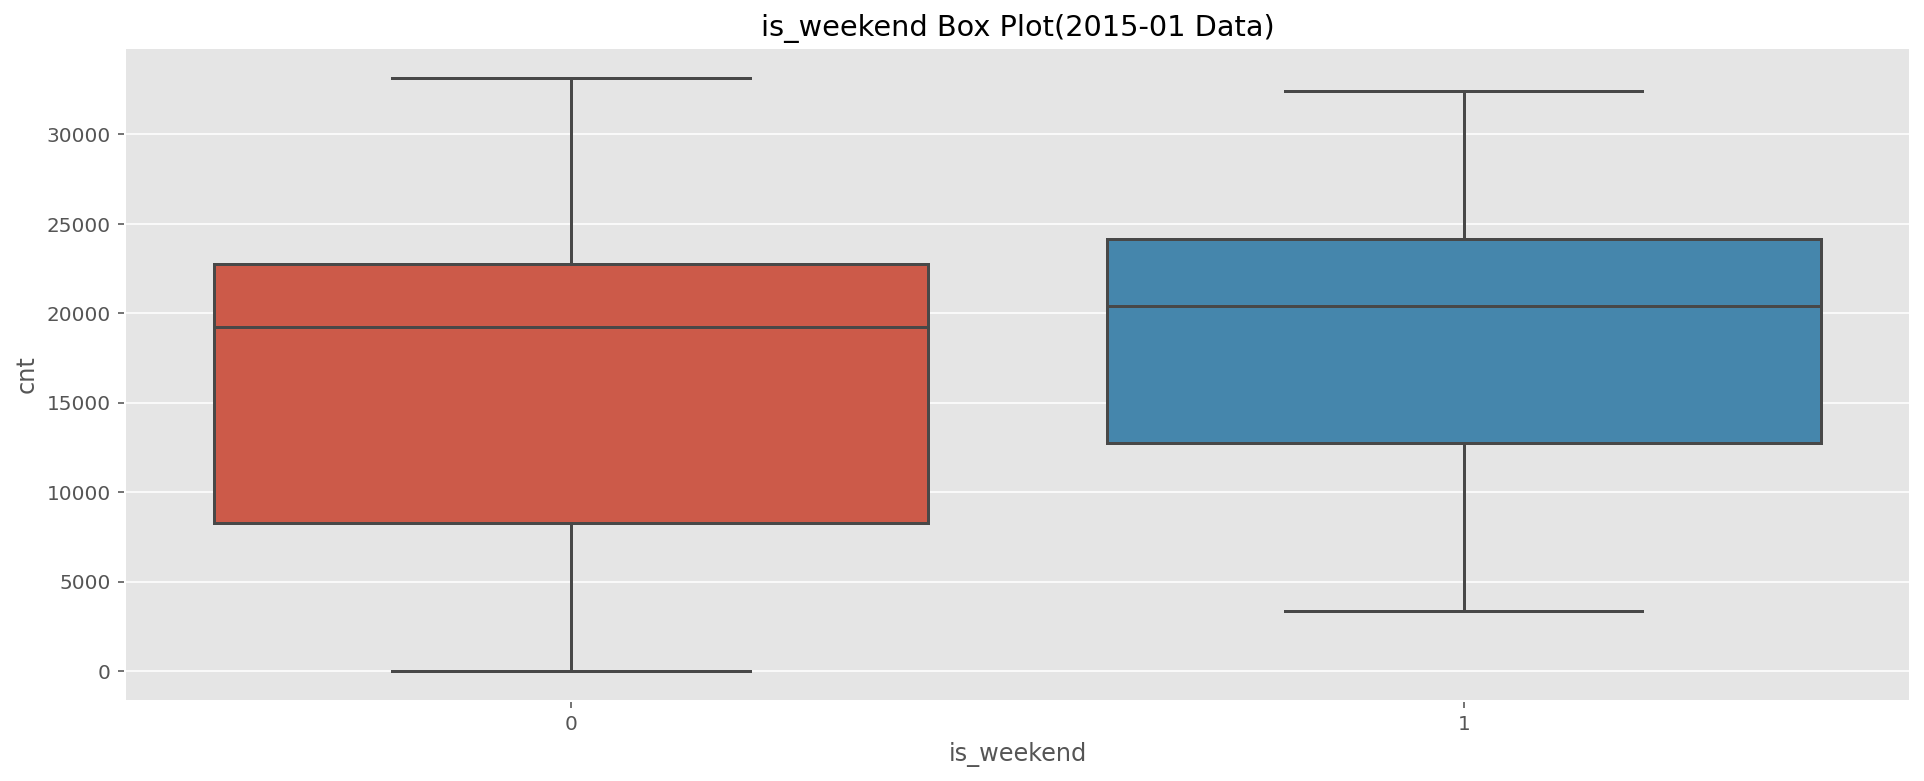

In [36]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df);
plt.title("is_weekend Box Plot(2015-01 Data)");

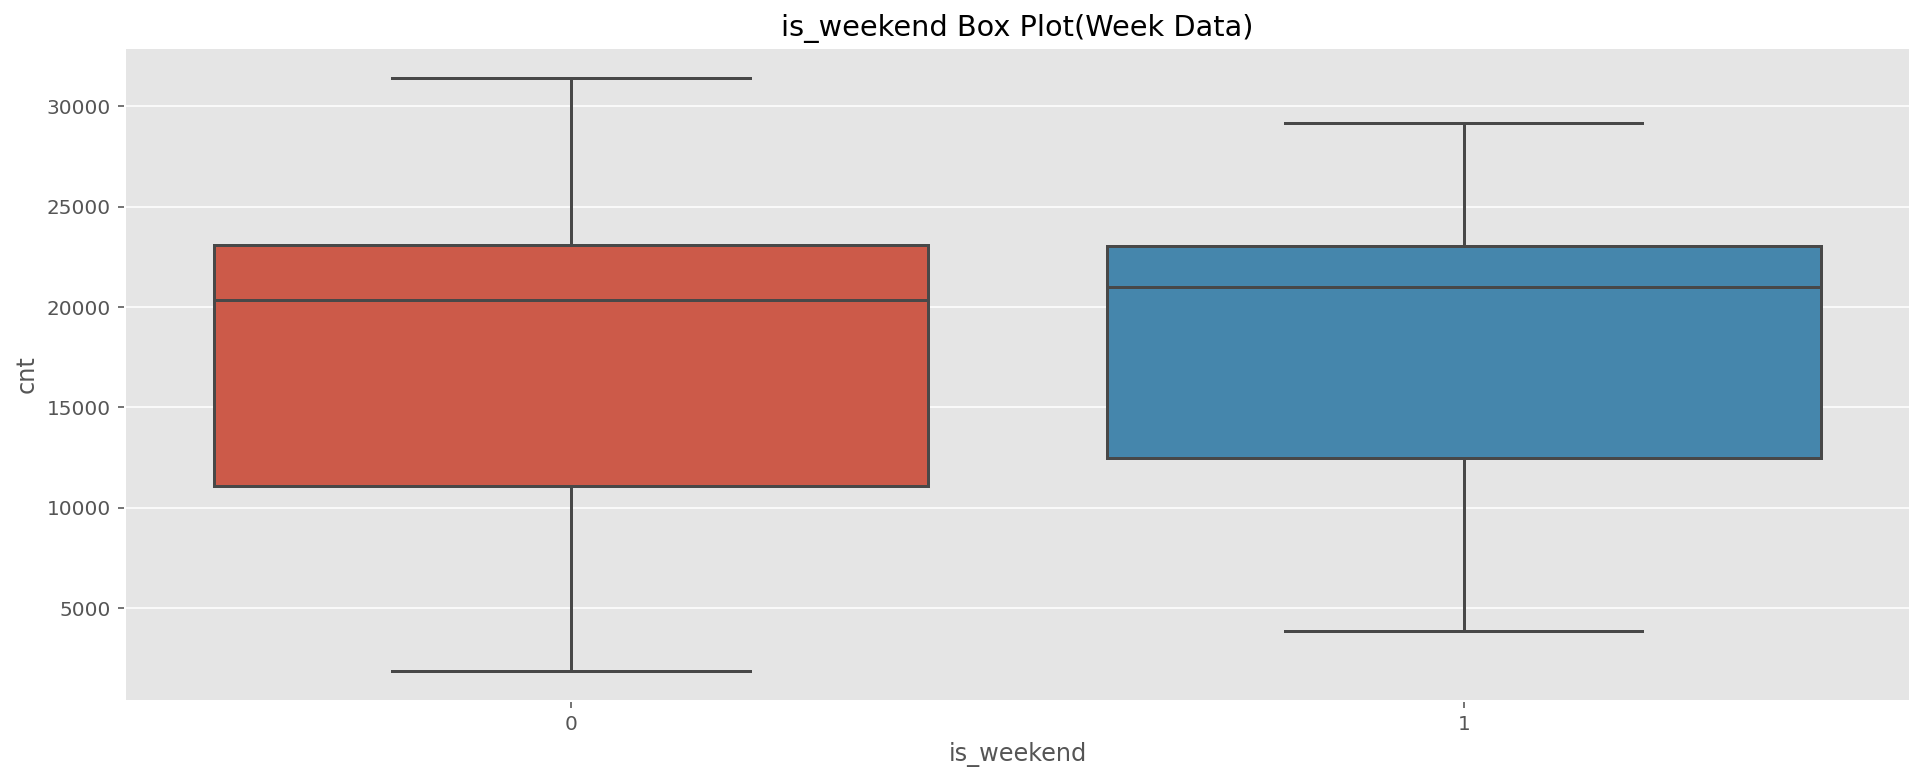

In [37]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df[df['weeknum']==4]);
plt.title("is_weekend Box Plot(Week Data)");

### Viloinplot
- [Violin Plots 101](https://mode.com/blog/violin-plot-examples)

In [38]:
weekday_dict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

In [39]:
def visualize_violinplot_by_weekday(df, y, weekday):
    plt.figure(figsize=(16, 6));
    sns.violinplot(x="hour", y=y, hue="weekday", 
                   data=df[df['weekday'] == weekday][['hour', 'weekday', y]],
                   inner="quart");    
    plt.title(f"{weekday_dict[weekday]}'s hourly violinplot {y}(2015-01 Data)")

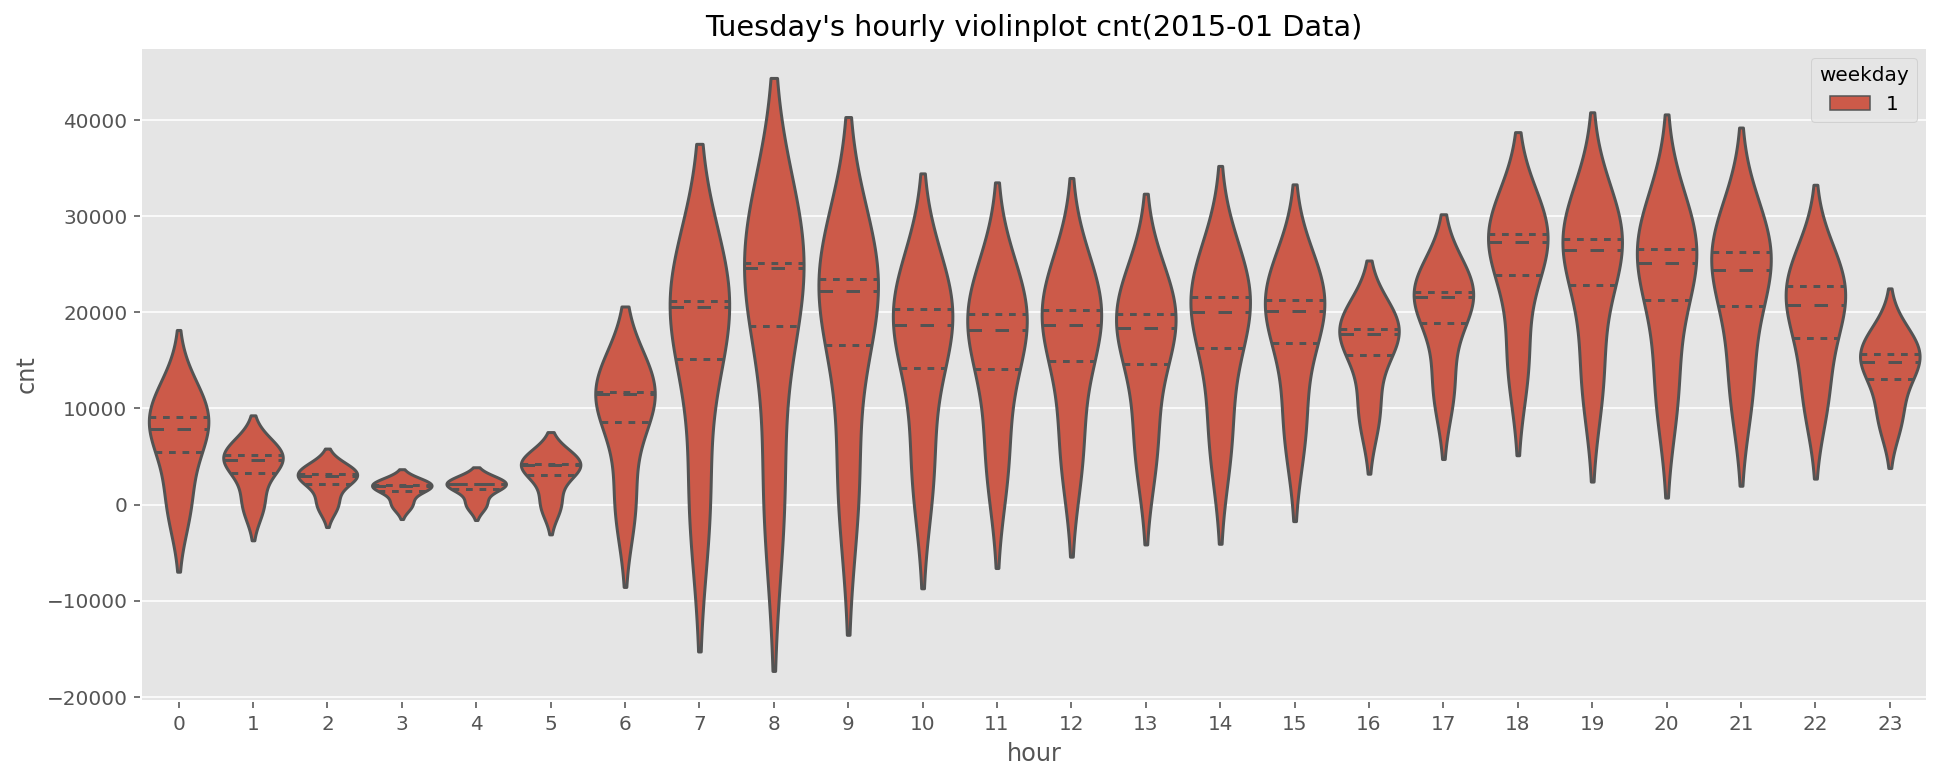

In [40]:
visualize_violinplot_by_weekday(df, 'cnt', 1)

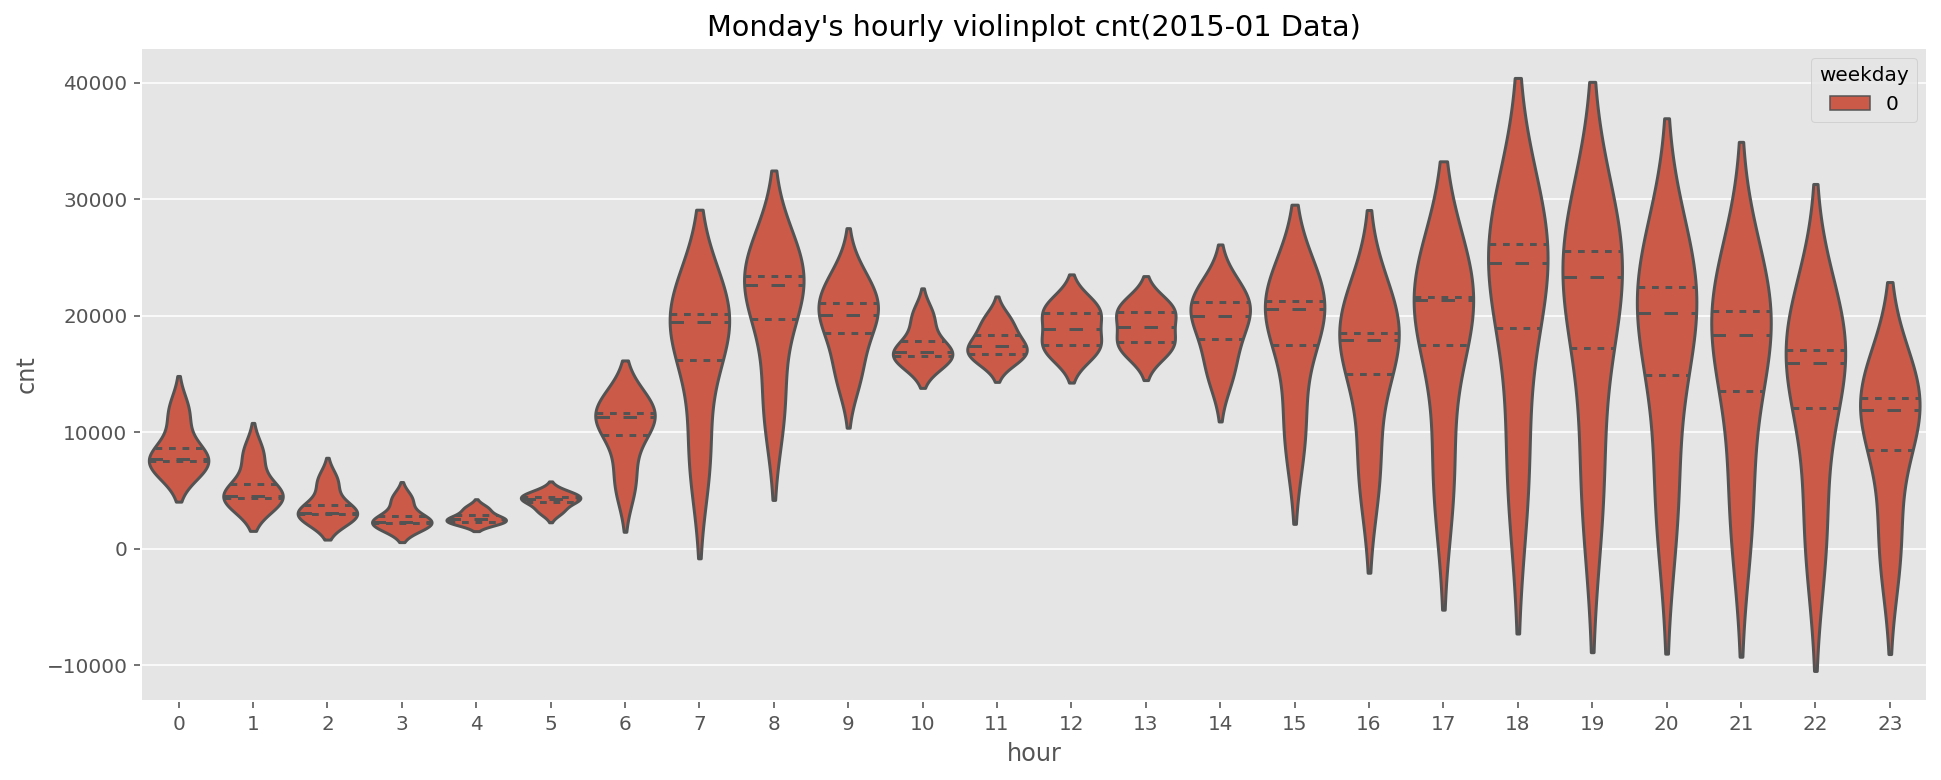

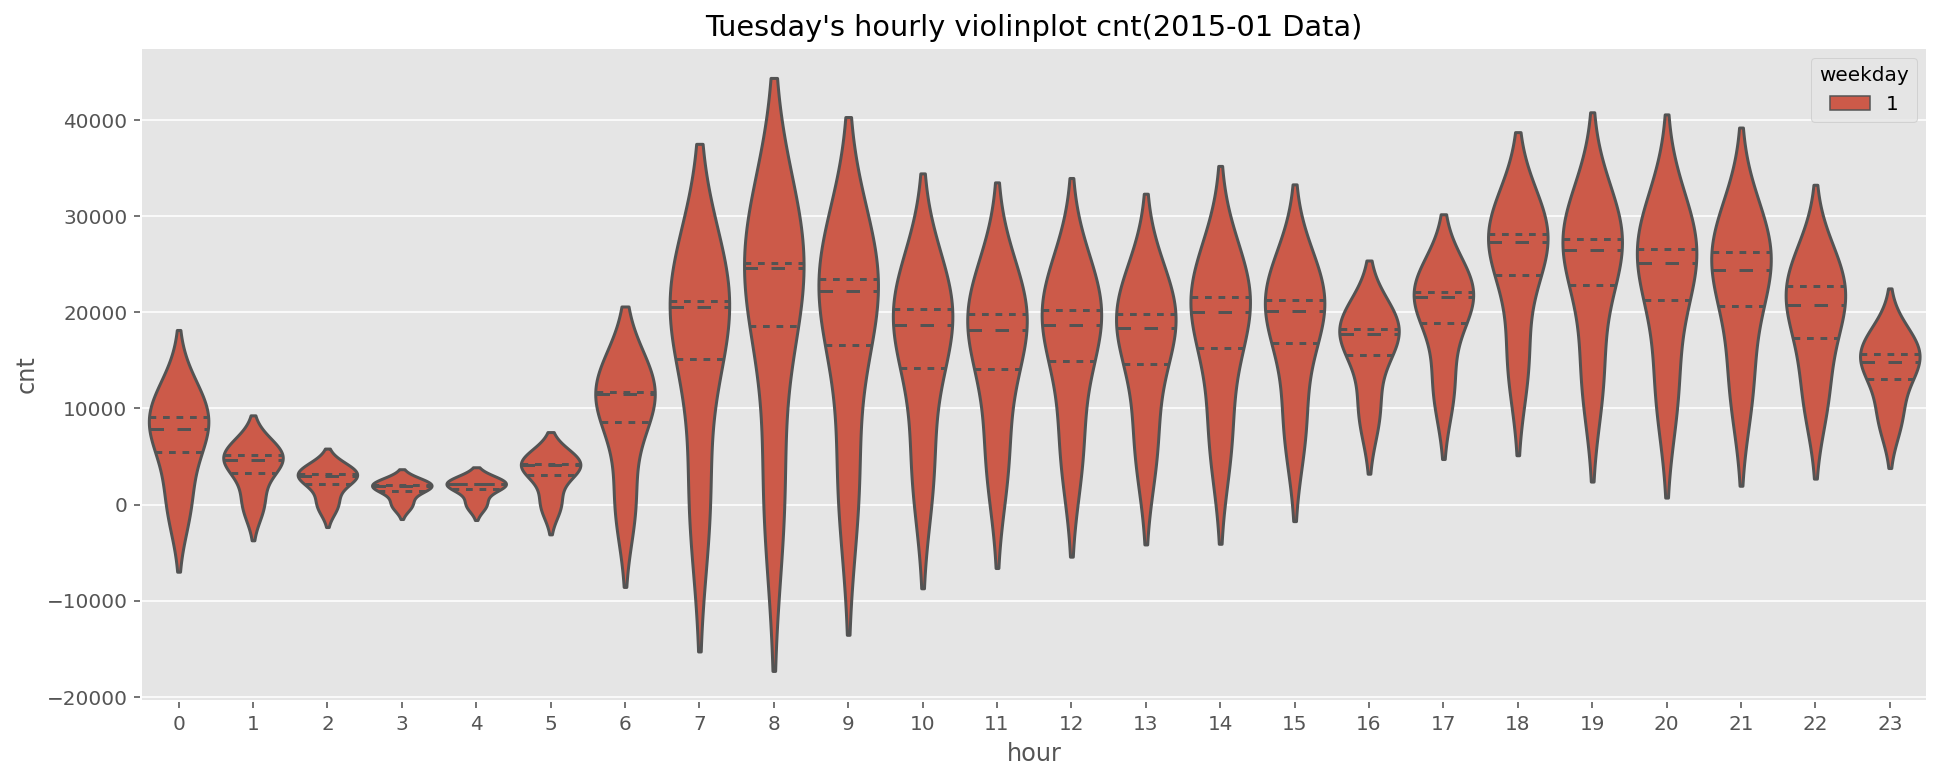

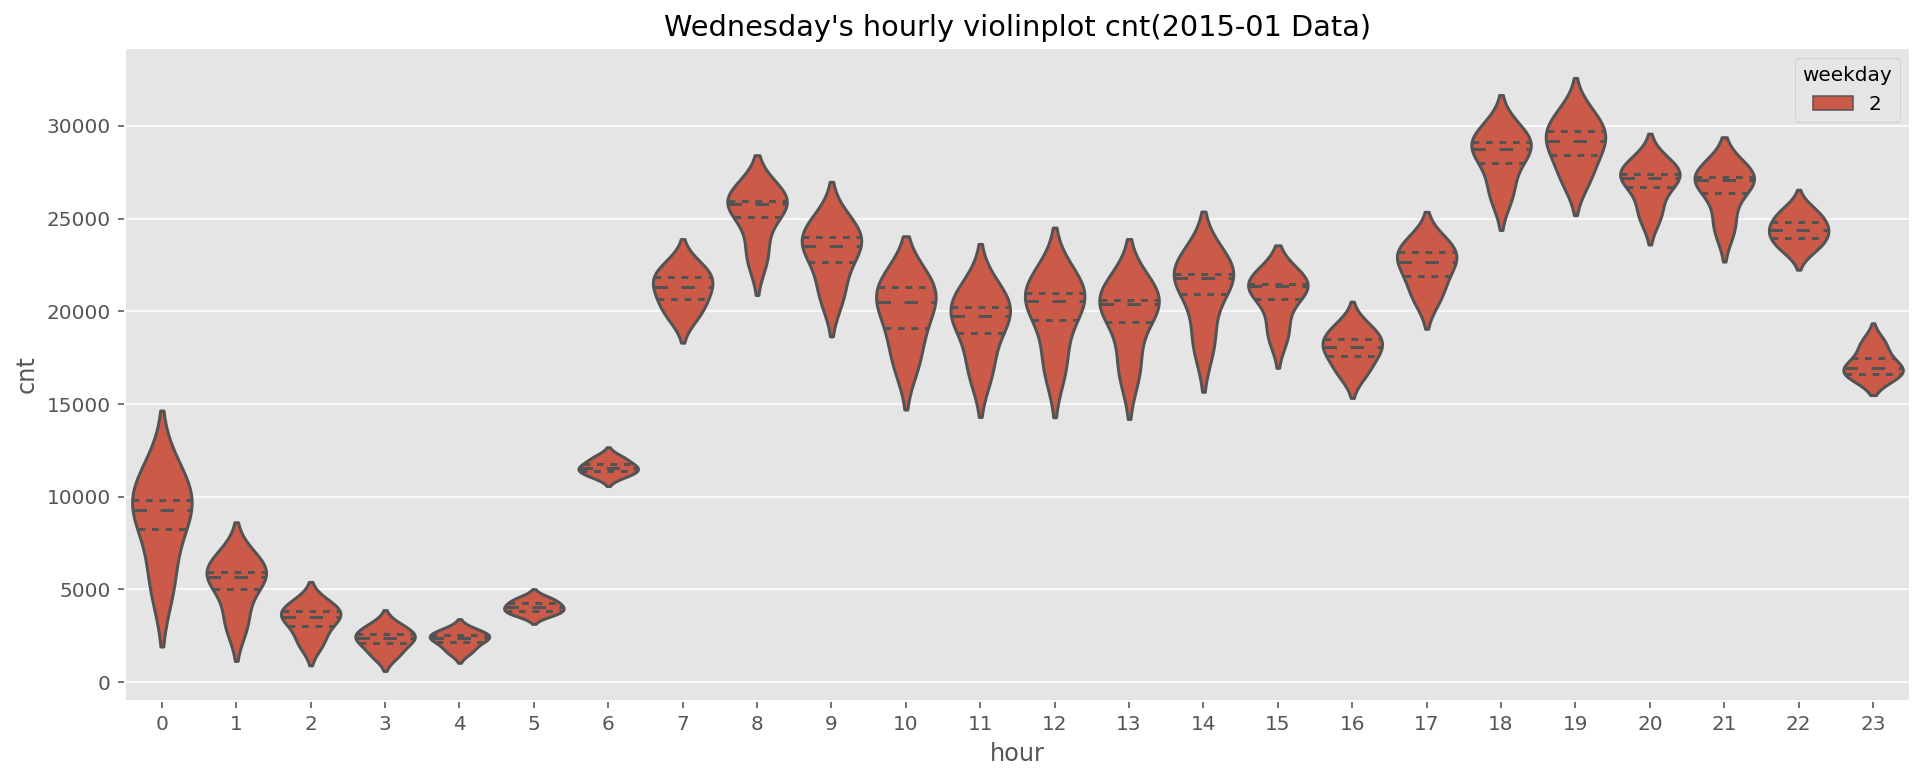

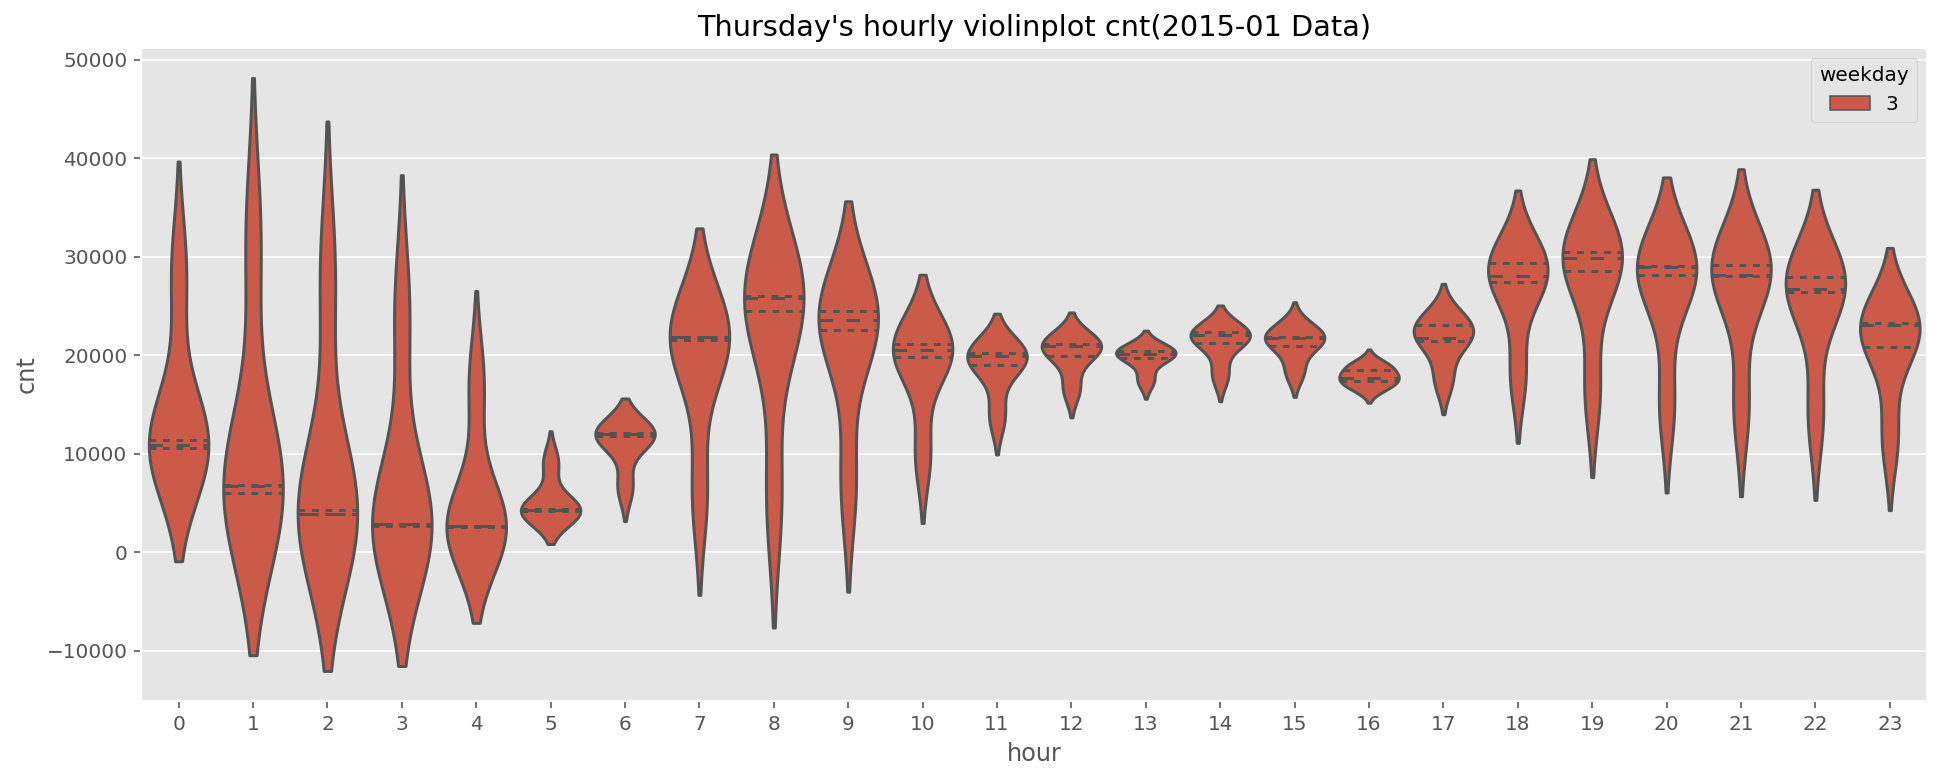

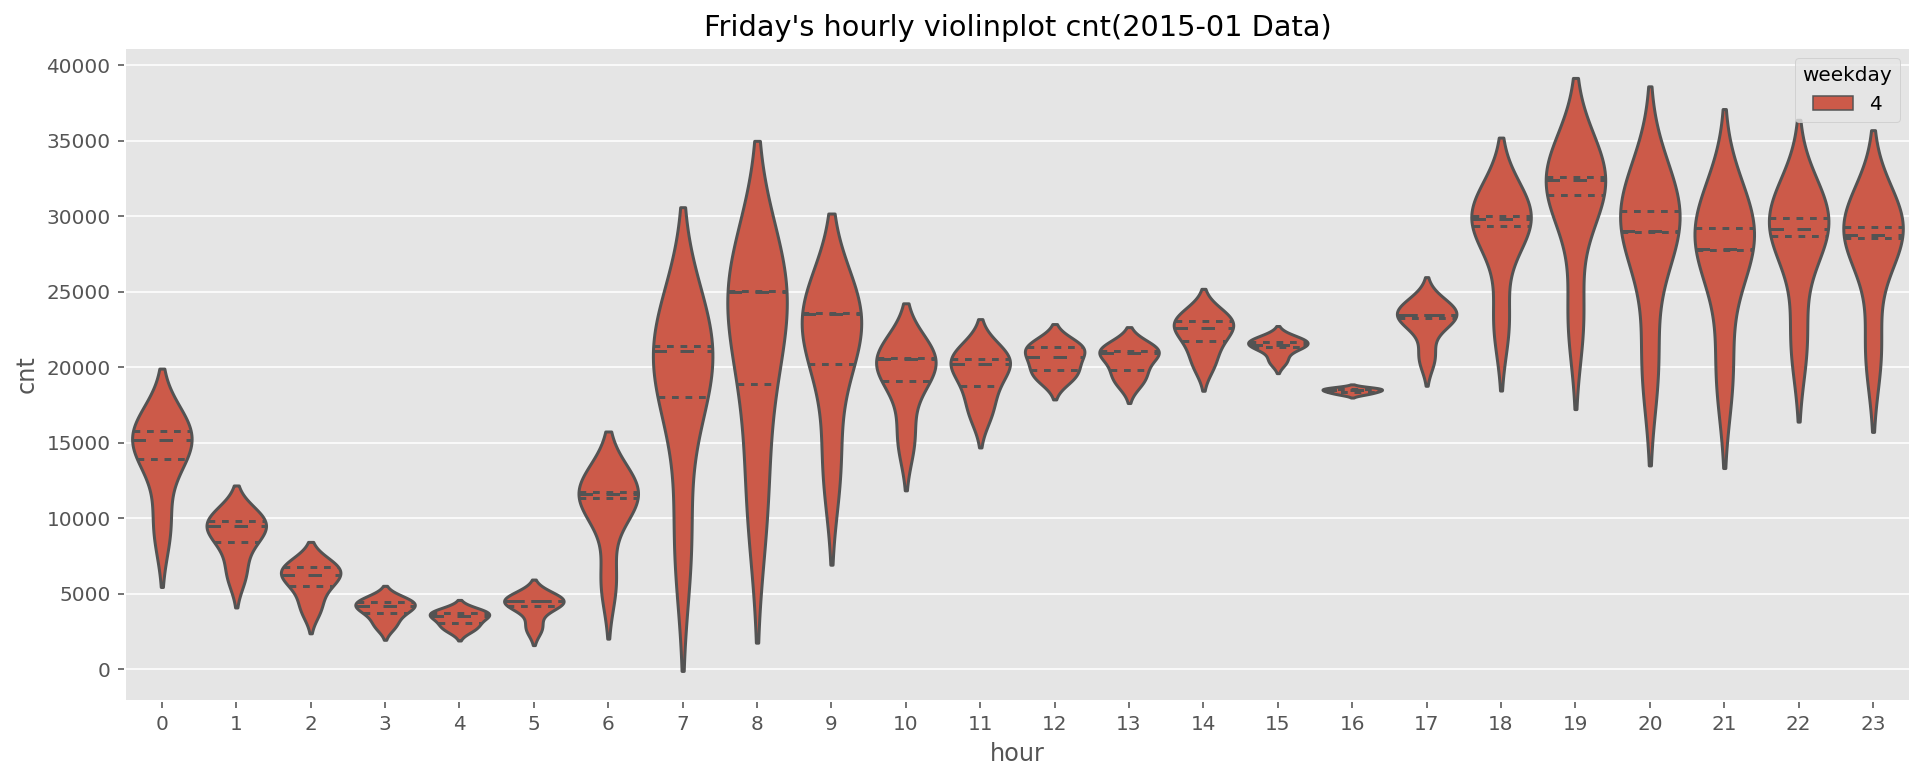

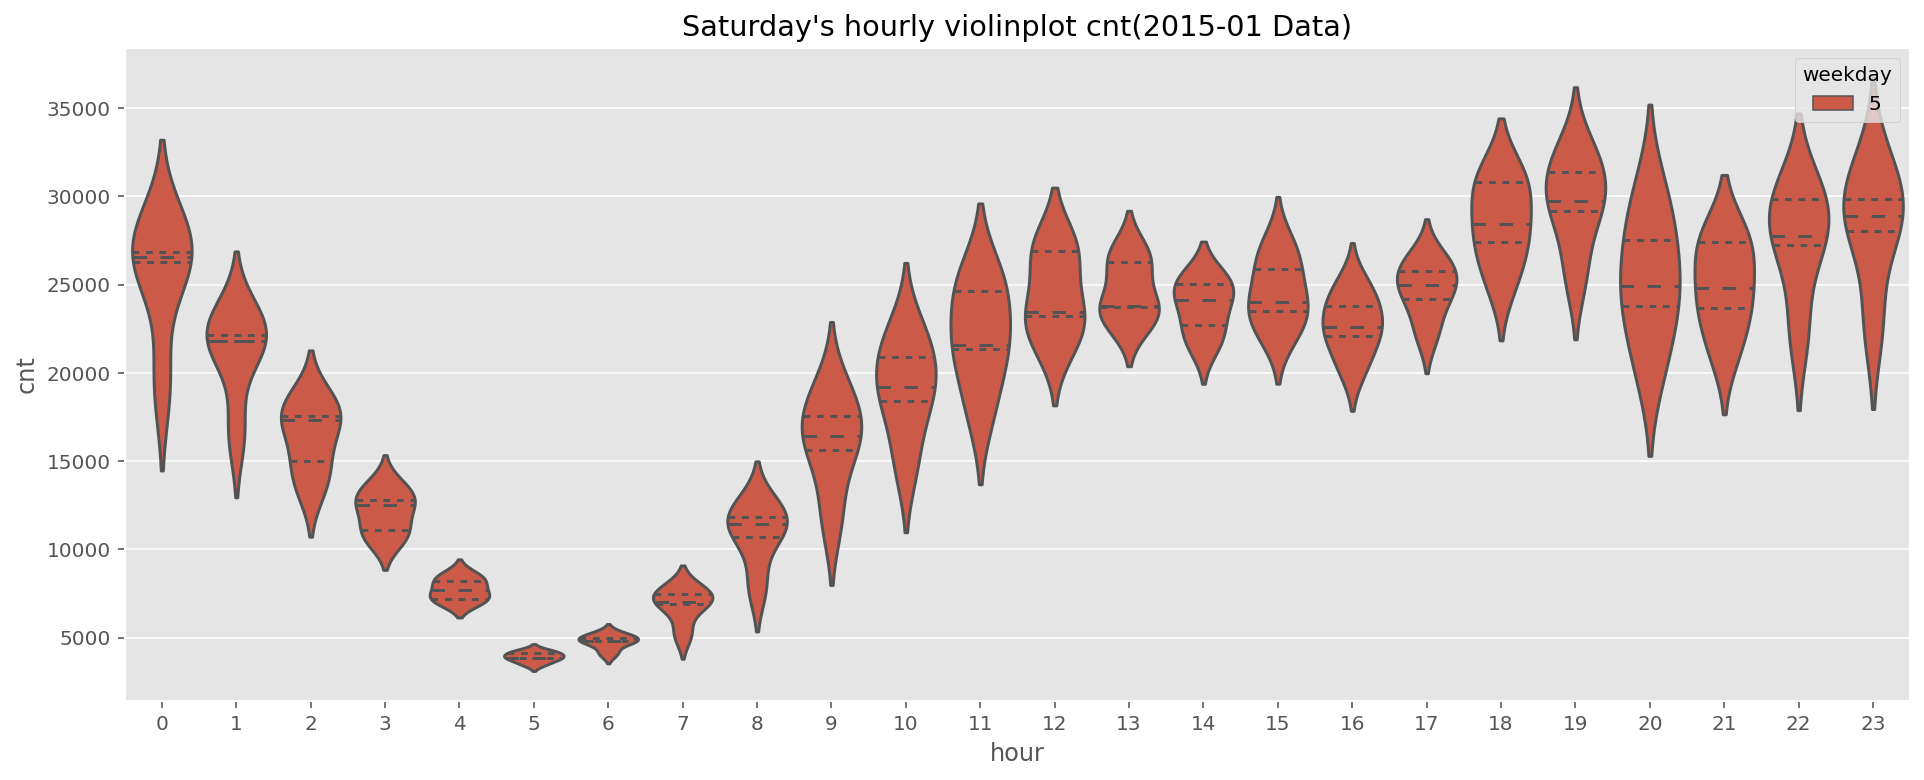

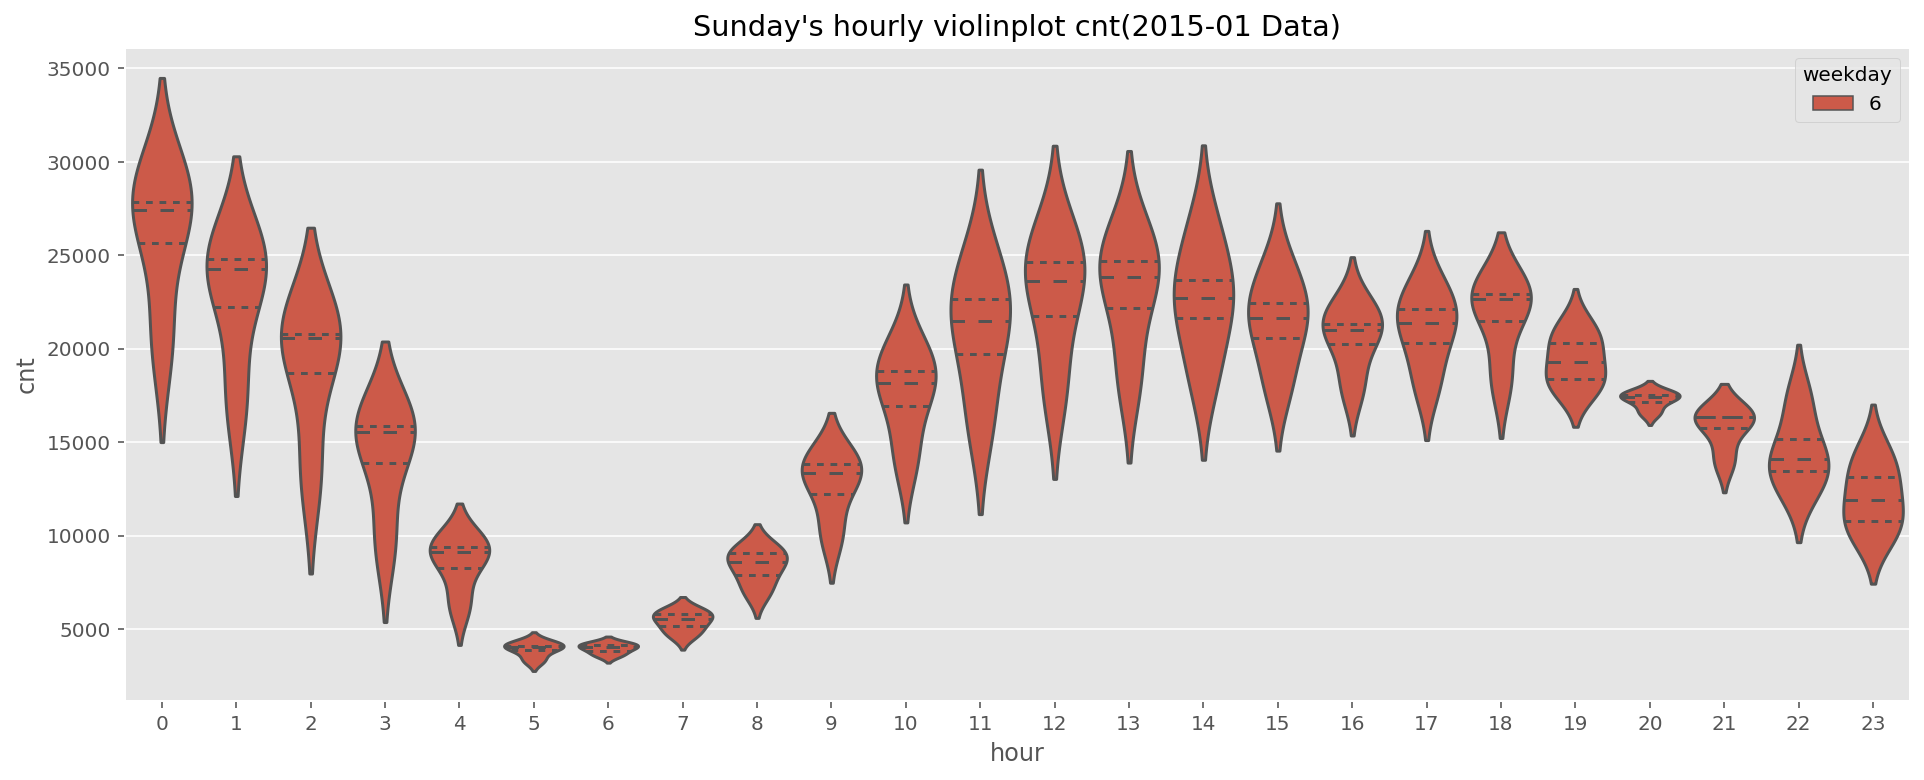

In [78]:
for weekday in range(0, 7):
    visualize_violinplot_by_weekday(df, 'cnt', weekday)

### 장거리/단거리 수요
- 시간대별 장거리/단거리 수요

In [41]:
%%time

short_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

short_trip_df = pd.read_gbq(query=short_trip_query, dialect='standard', project_id='my_id')


CPU times: user 55 ms, sys: 8.1 ms, total: 63.1 ms
Wall time: 5.98 s


In [42]:
%%time

long_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance >= 30
GROUP BY pickup_hour, dropoff_hour

"""

long_trip_df = pd.read_gbq(query=long_trip_query, dialect='standard', project_id='my_id')

CPU times: user 46.8 ms, sys: 6.63 ms, total: 53.5 ms
Wall time: 3.82 s


In [43]:
short_trip_df.head(2)

pickup_hour  dropoff_hour   count
0            9             9  457809
1           21            21  575352

In [44]:
long_trip_df.head(15)

pickup_hour  dropoff_hour  count
0            17            18    132
1            22            23     98
2            19            19     30
3            21            21     37
4             8             9     74
5             4             5     41
6            13            14    114
7             2             3     60
8            10            11     96
9            14            15    137
10            0             2     16
11            8             8     11
12           19            20    104
13           23             1     16
14           12            13     82

In [45]:
trip_df = short_trip_df.merge(long_trip_df, on=["pickup_hour", "dropoff_hour"], suffixes=["_short", "_long"]) \
                       .rename(columns={"count_short":"short_trips", "count_long":"long_trips"})

In [46]:
trip_df.head()

pickup_hour  dropoff_hour  short_trips  long_trips
0            9             9       457809          12
1           21            21       575352          37
2           19            19       653731          30
3           10            11       117935          96
4           15            15       510697          38

In [47]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="pickup_hour")
trip_df_dropoff = trip_df.groupby(["dropoff_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="dropoff_hour")

In [48]:
trip_df_pickup.head()

pickup_hour  short_trips  long_trips
0            0       469713         146
1            1       354890          94
2            2       267918          89
3            3       198414          59
4            4       143109          62

In [49]:
def plt_clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # 24시간을 위한 theta 생성
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # plot의 각각의 bin width 지정
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # label을 시계 방향으로 설정하고 위에서 시작
    ax.set_theta_zero_location("N")
    # 시계 방향 설정
    ax.set_theta_direction(-1)

    # label 설정
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [50]:
def diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    # 2, 2의 첫번째에 그림
    ax = plt.subplot(2,2,1, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['short_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    # 2, 2의 두번째에 그림
    ax = plt.subplot(2,2,2, polar=True)
    # 24시간의 각각의 bin에 히스토그램 그림
    radii = np.array(trip_df_pickup['long_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_dropoff['short_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_dropoff['long_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

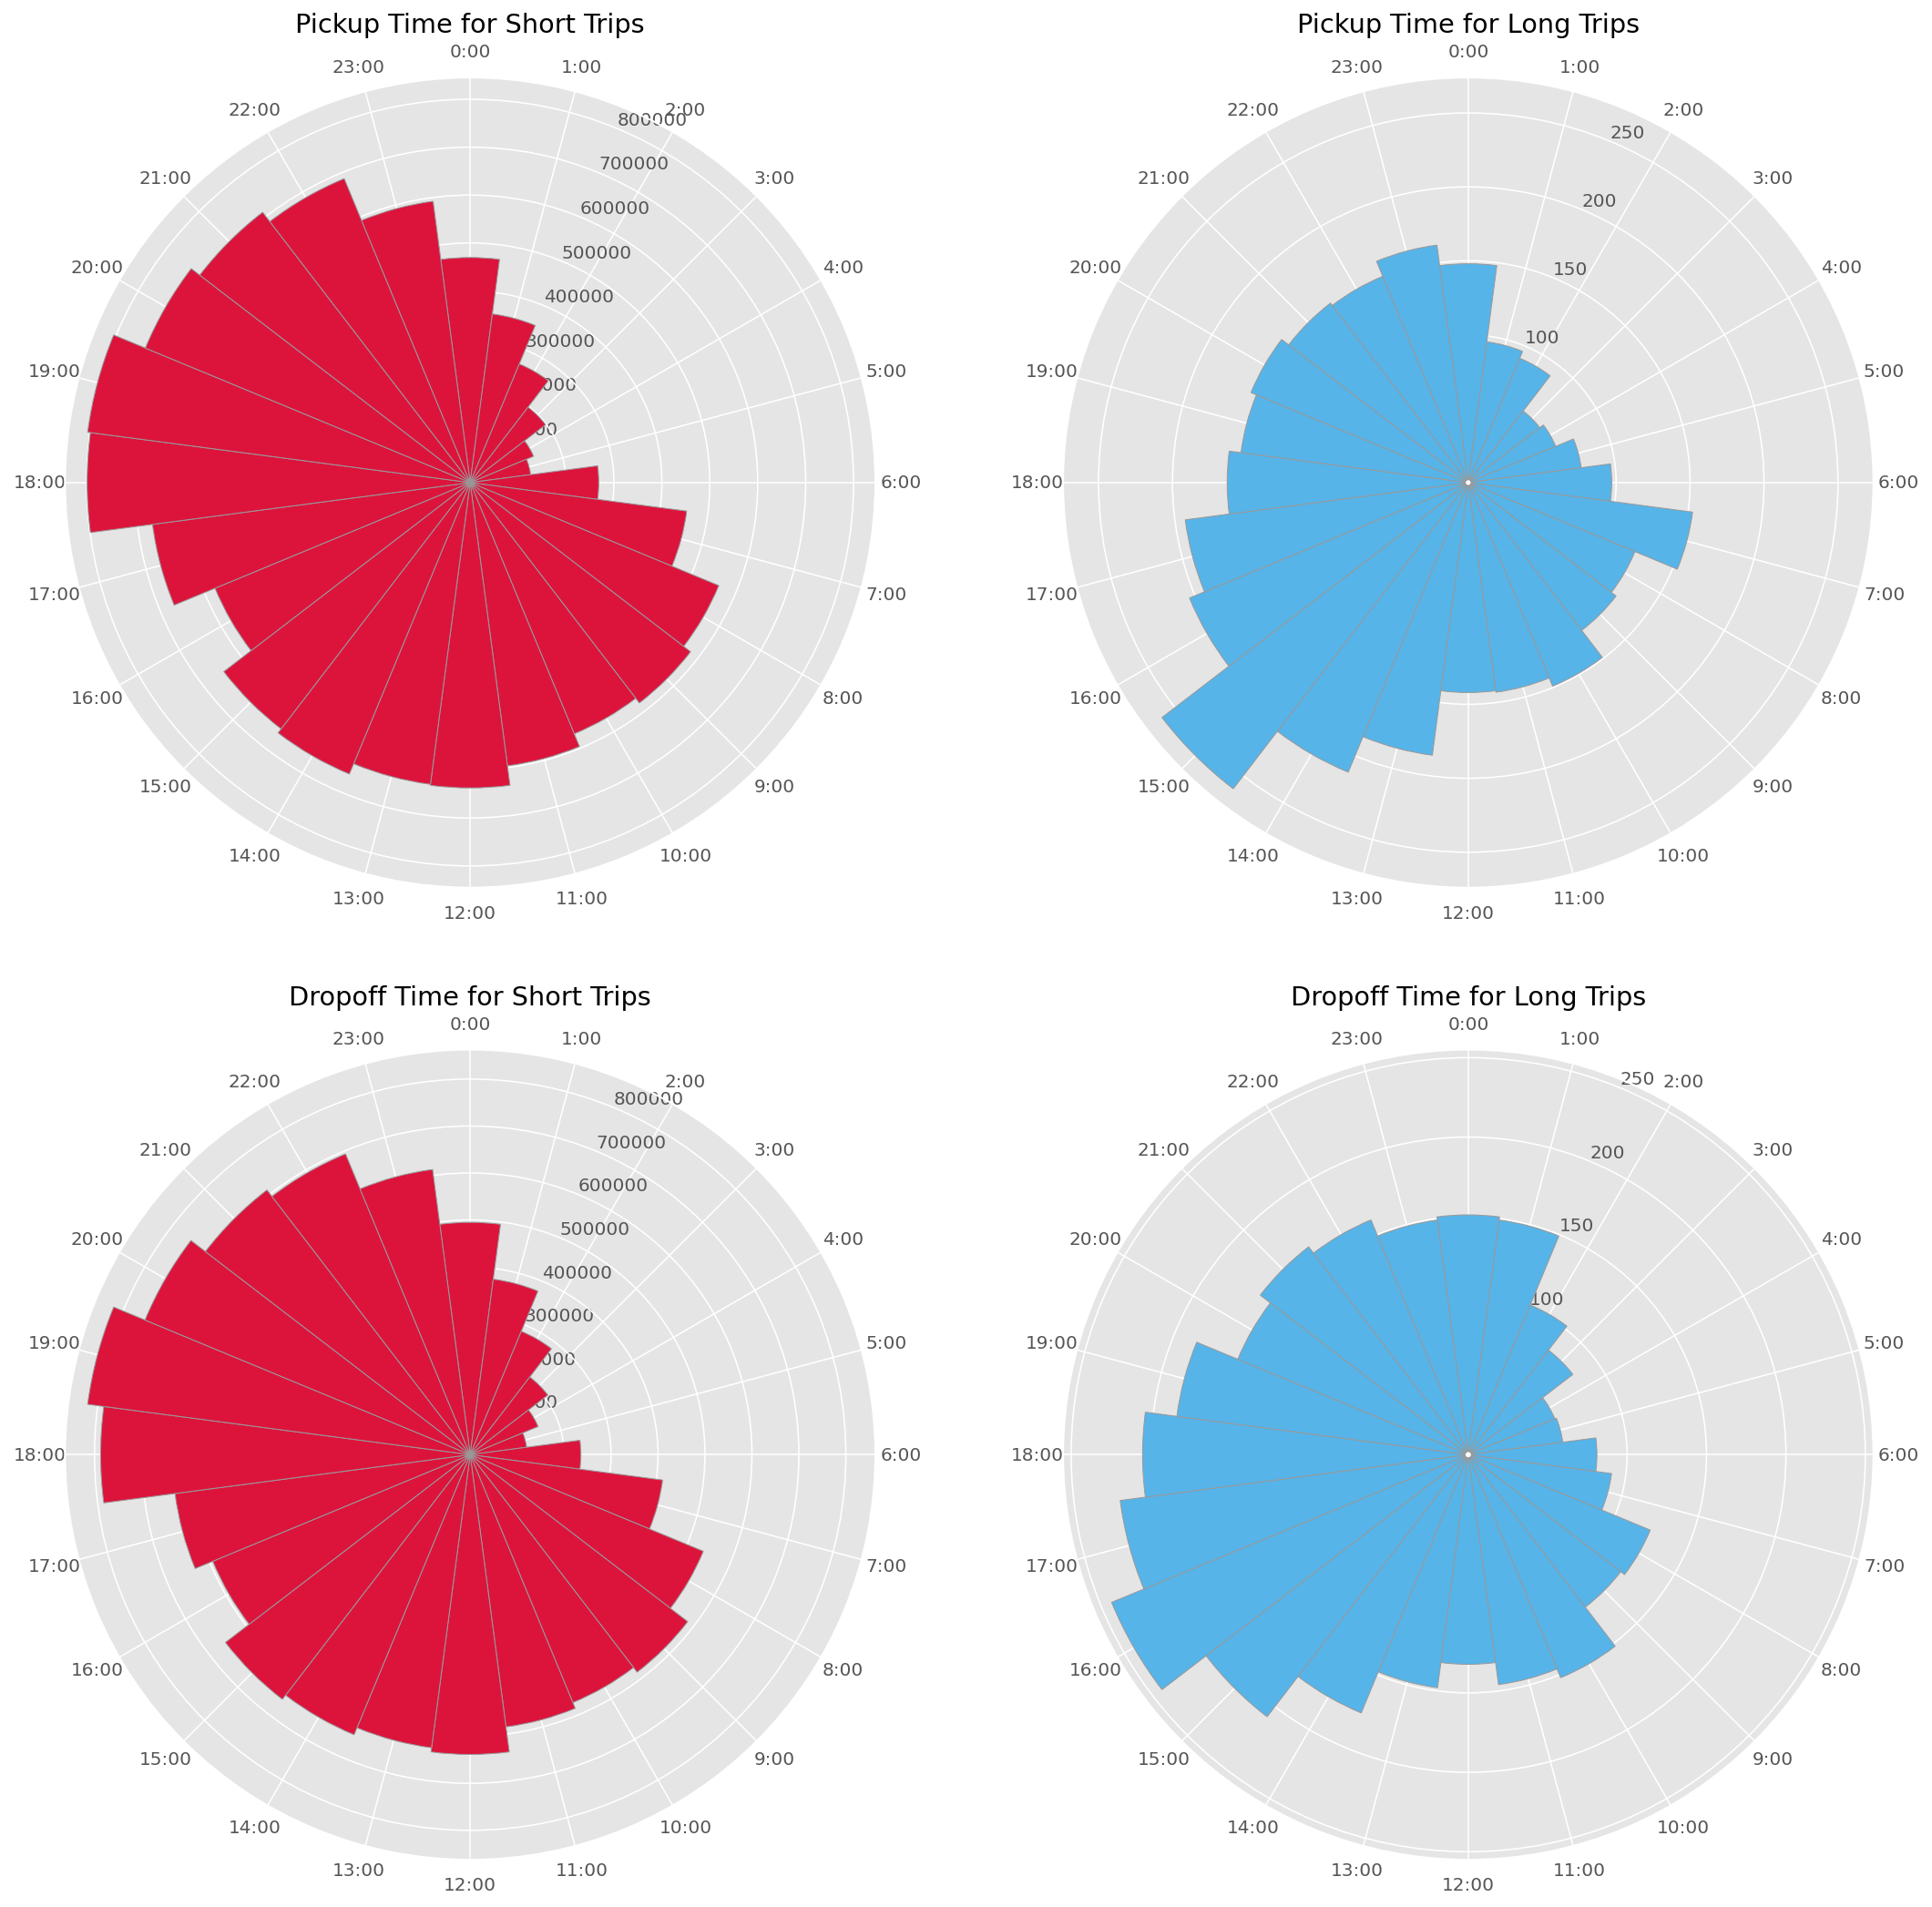

In [51]:
diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff)

### - 피크 타임
    - Short trip
        - 18:00 ~ 22:00
    - Long trip
        - 13:00 ~ 15:30?
